# Домашнее задание 5. Градиентный спуск. (10 баллов + 2.5 бонус)

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [1]:
from typing import Iterable, List

import matplotlib.pyplot as plt
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [3]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [4]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        loss = (X.dot(w) - y) ** 2
        loss = loss.sum() / y.shape[0]
        return loss

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        return 2 * X.T.dot(X.dot(w) - y) / y.shape[0]

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [5]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`, 
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать 
траекторию спуска (список из новых значений весов на каждом шаге)

In [6]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    
    hist = []
    hist.append(w_init)
    w = w_init
    
    for i in range(n_iterations):
        w = w - lr * loss.calc_grad(X, y, w)
        hist.append(w)
    
    return hist

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [7]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [8]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.58917680450253
0.8670644395649493


In [9]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(16, 9))
    plt.title("GD trajectory")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    # visualize the level set
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`. 

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

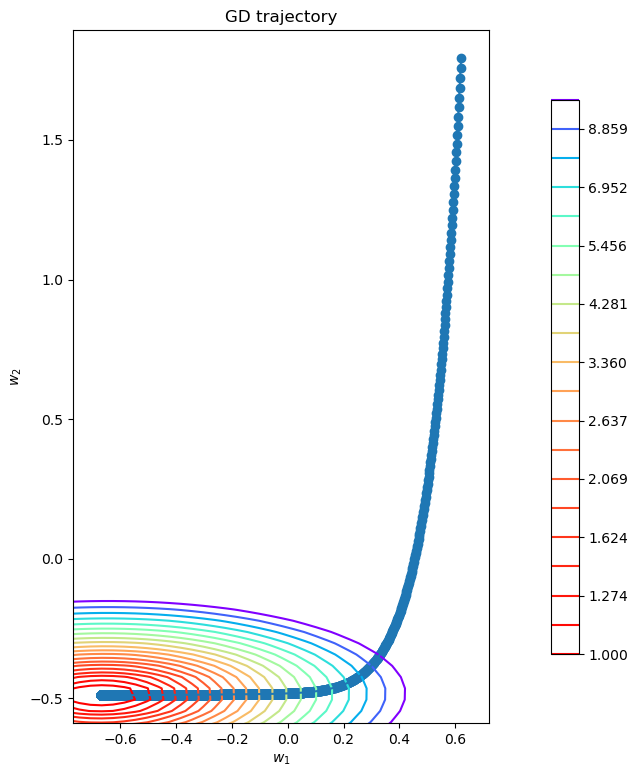

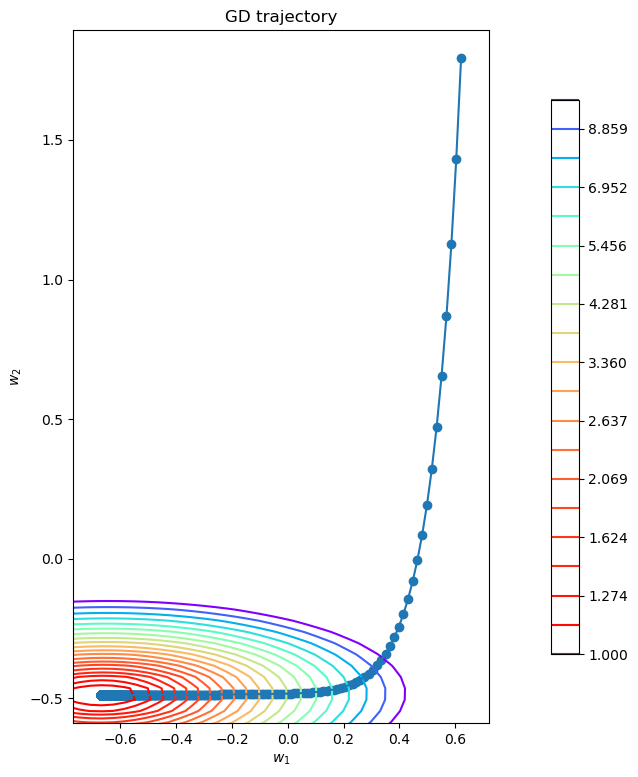

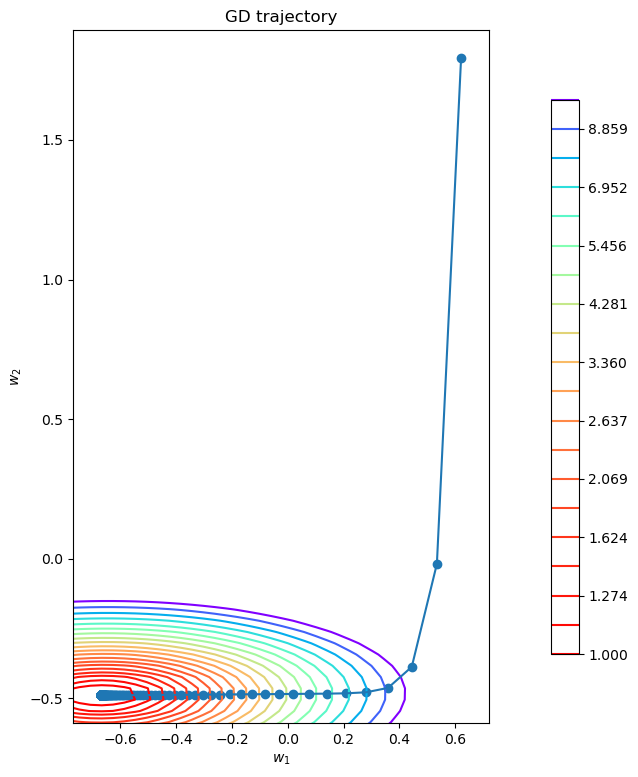

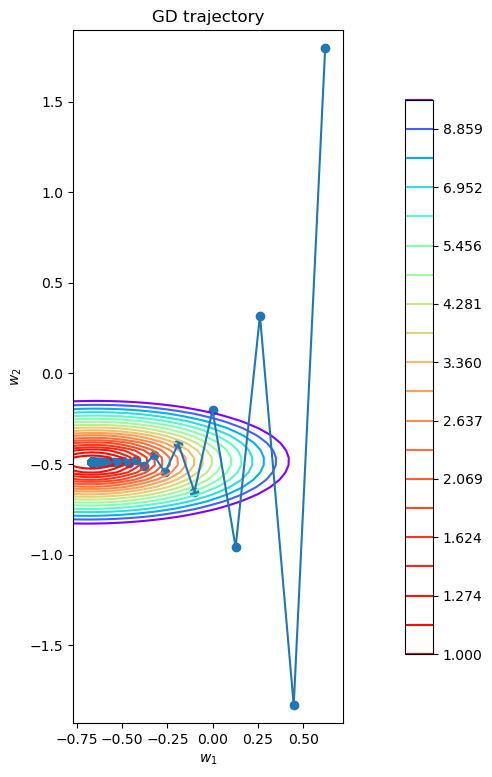

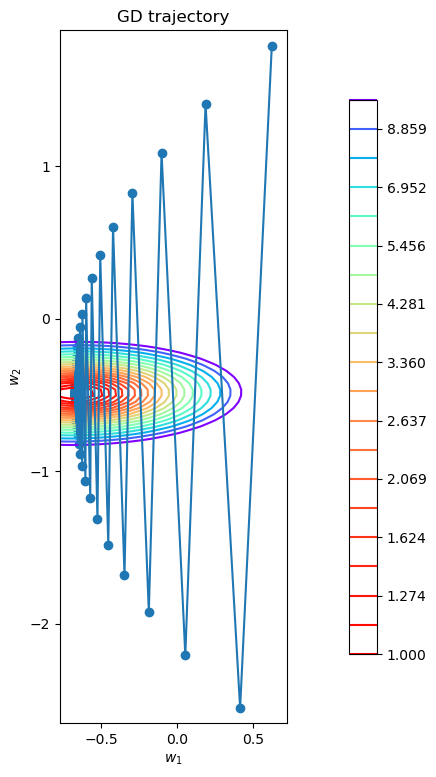

In [10]:
lr = [0.0001, 0.001, 0.005, 0.01, 0.012]
loss = MSELoss()
for i in lr:
    hist = gradient_descent(w_init, X, y, loss, i, 100000)
    plot_gd(hist, X, y, loss)

При слишком маленькой длине шага слишком медленно (что можно сказать по большому количеству точек, график похож на связку "сосисок" :))), а при довольно большой - 0.012 (большую построить нельзя, тк возникает ошибка и спуск расходится), мы можем заметить, что спуск сильно расходится и может даже не попасть в минимум. Наиболее оптимальной по количеству "промахов" и быстроте здесь выглядит длина шага 0.01

Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча. 

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [11]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    sthist = list()
    sthist.append(w_init)
    for _ in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batch = X[batch_indices]
        cur = sthist[-1]
        cur = cur - lr * loss.calc_grad(batch, y[batch_indices], cur)
        sthist.append(cur)
    return sthist

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`. 

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

In [12]:
lr = [0.0001, 0.001, 0.005, 0.01]
batch_size = [1, 2, 5, 10, 50, 100, 200]

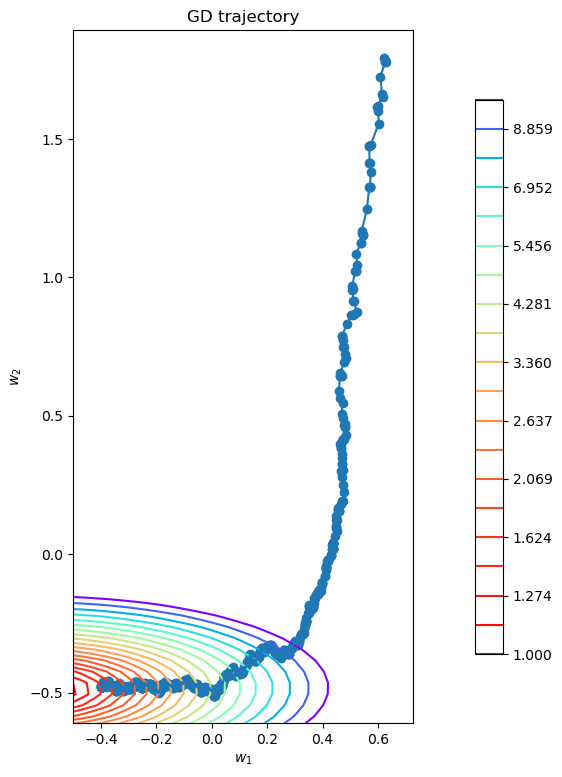

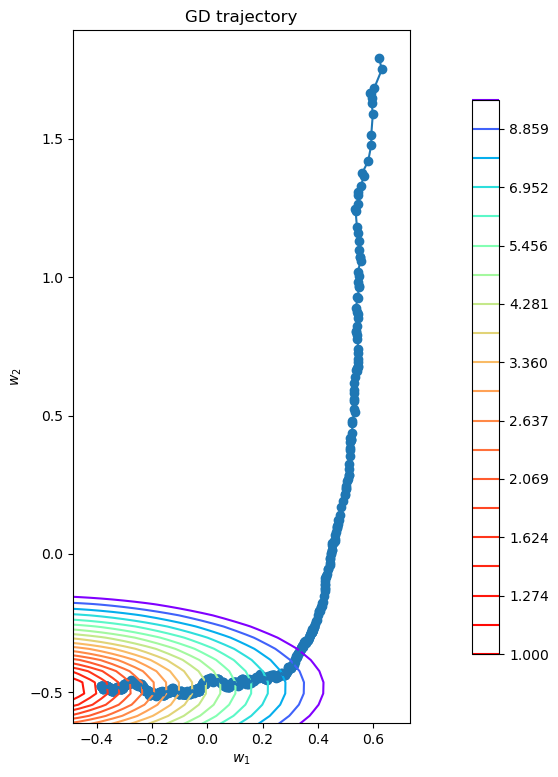

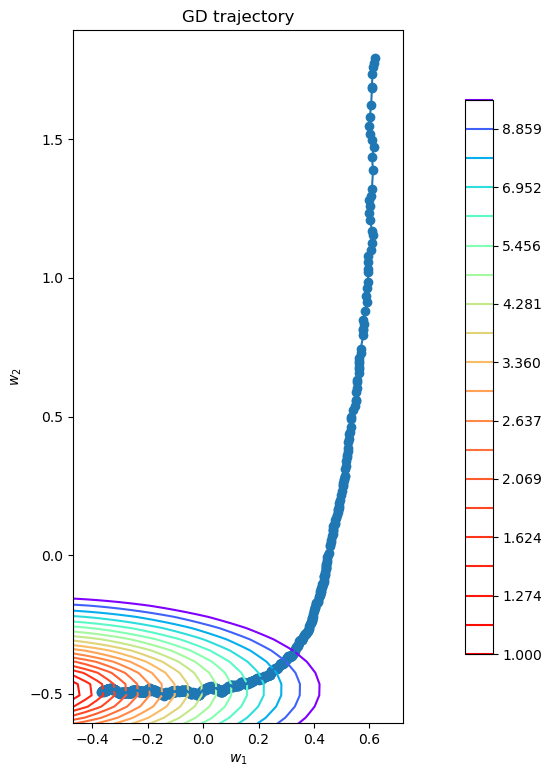

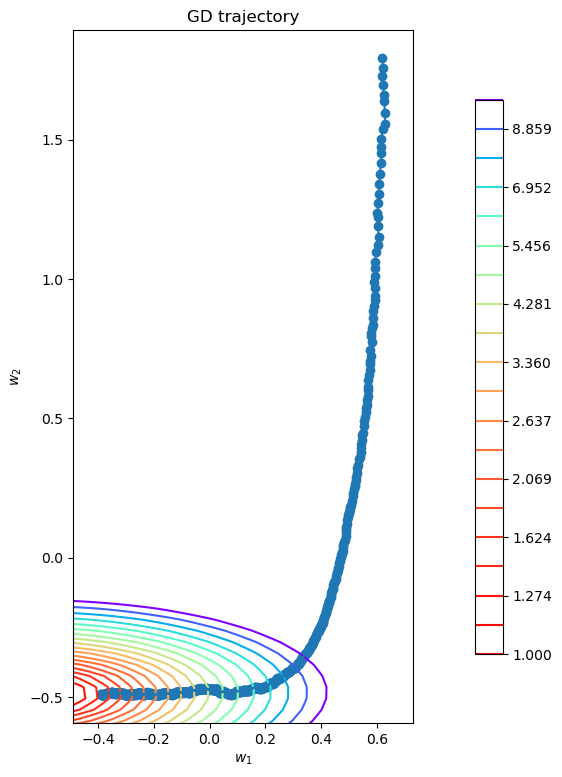

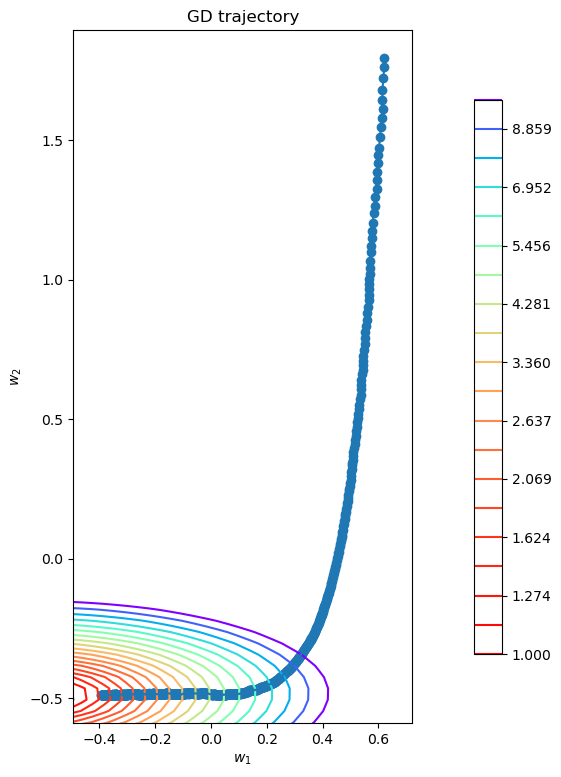

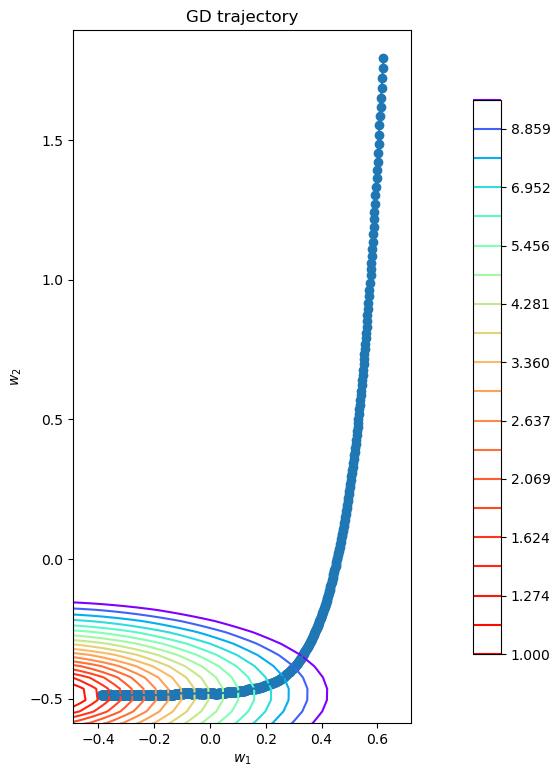

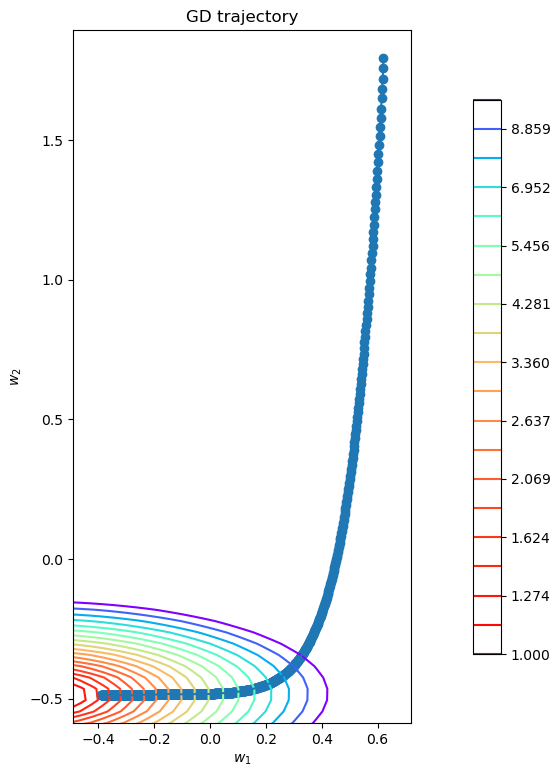

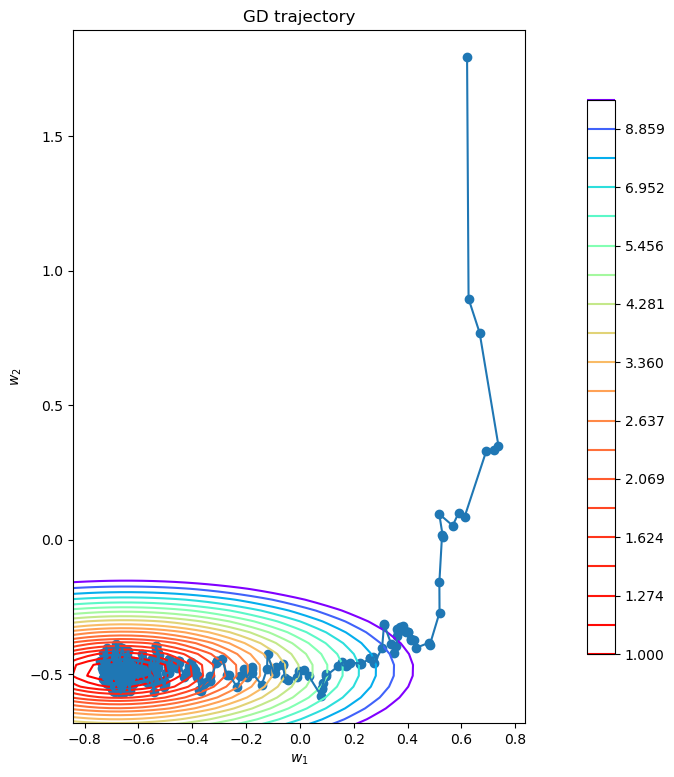

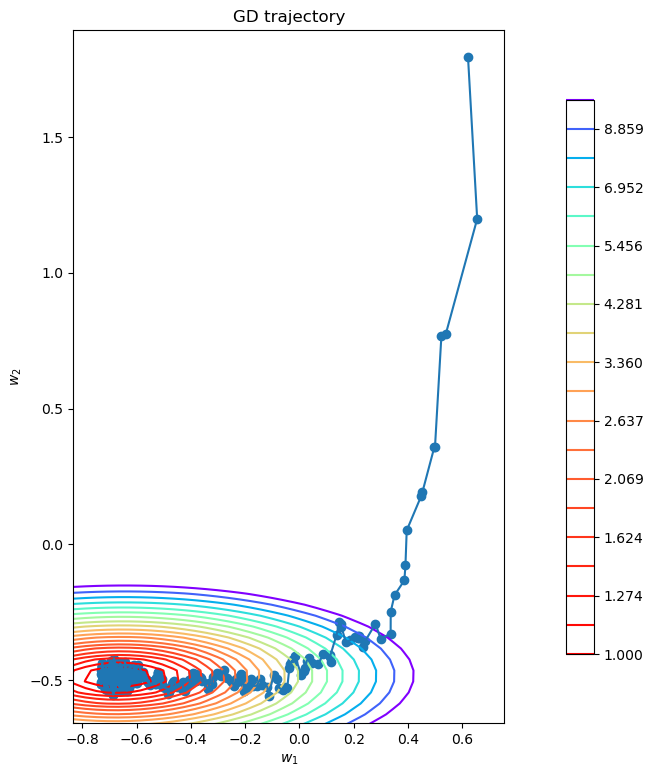

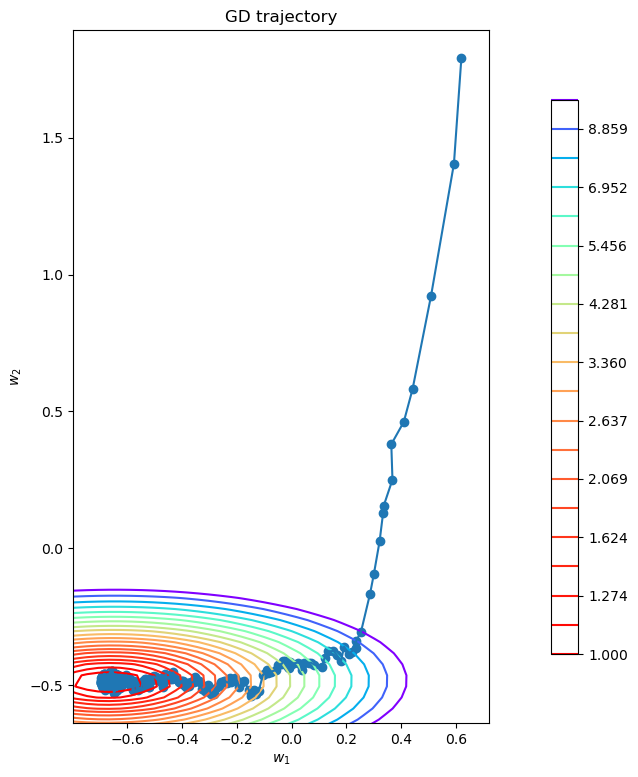

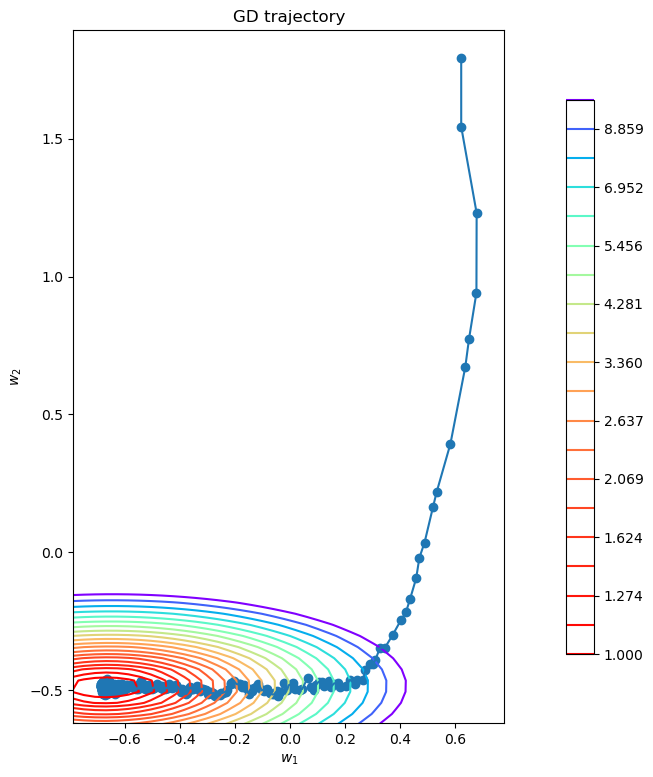

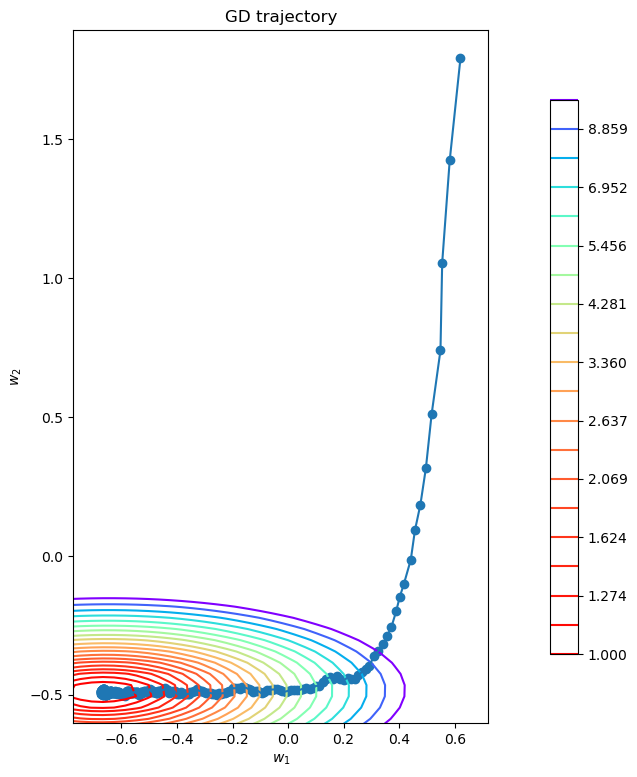

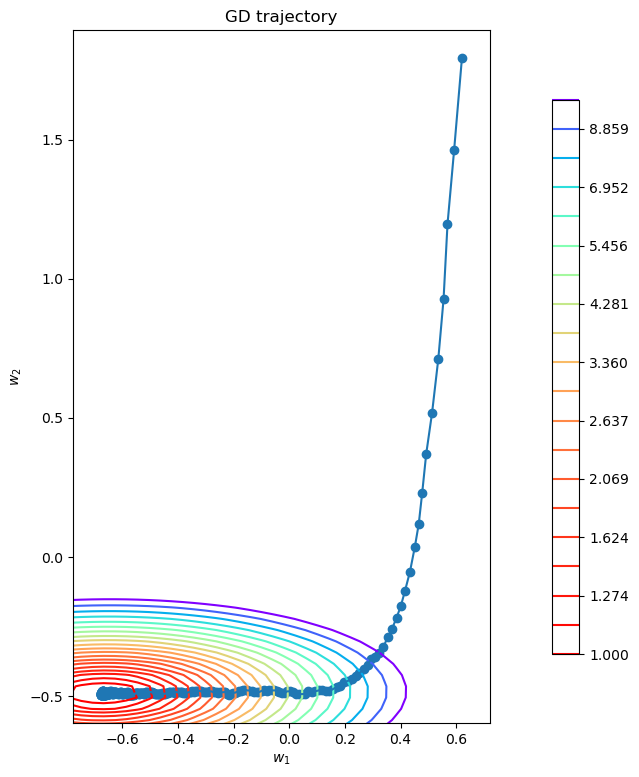

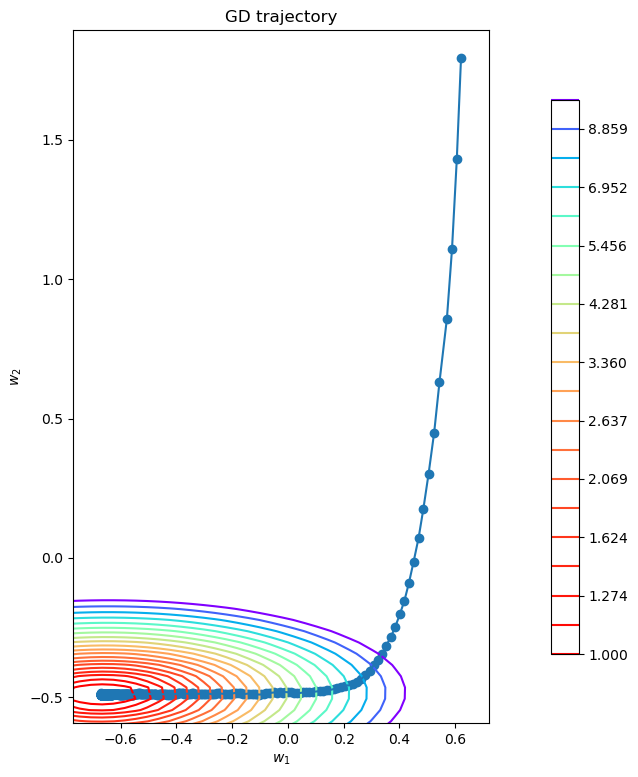

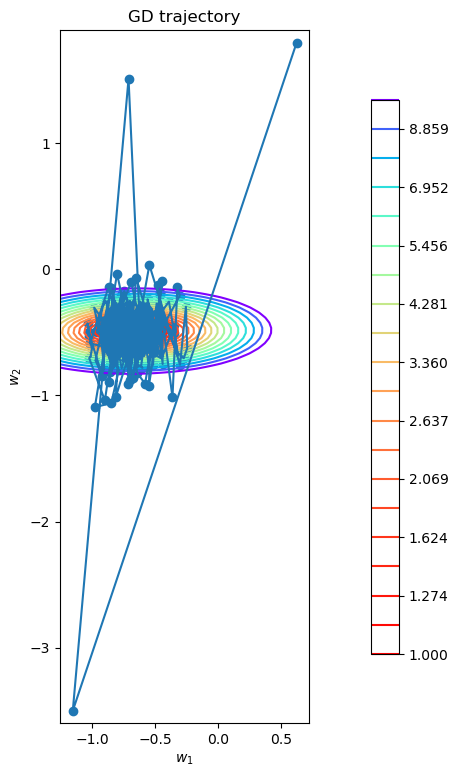

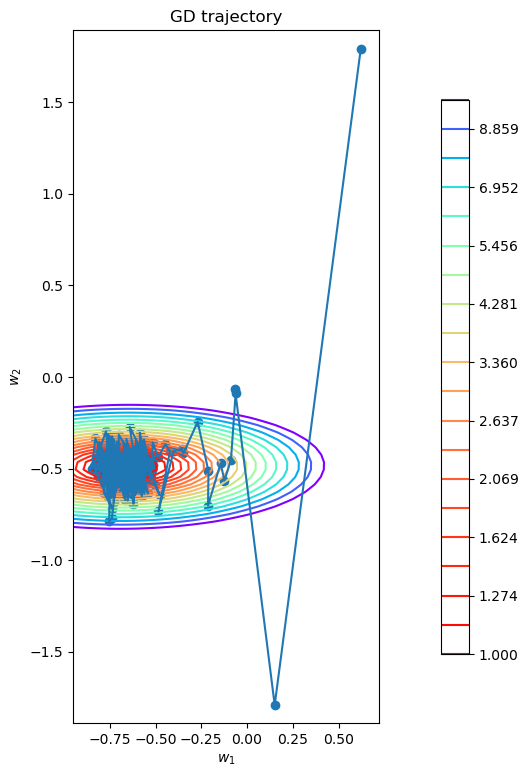

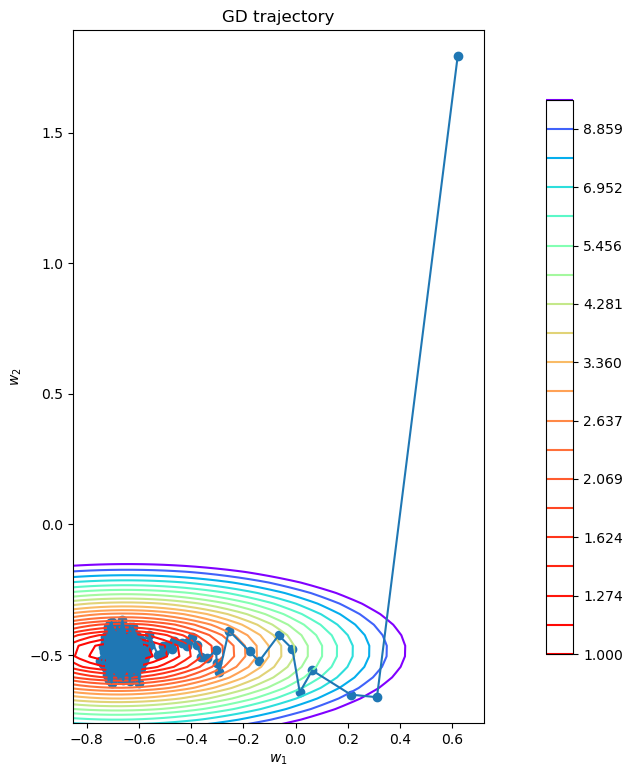

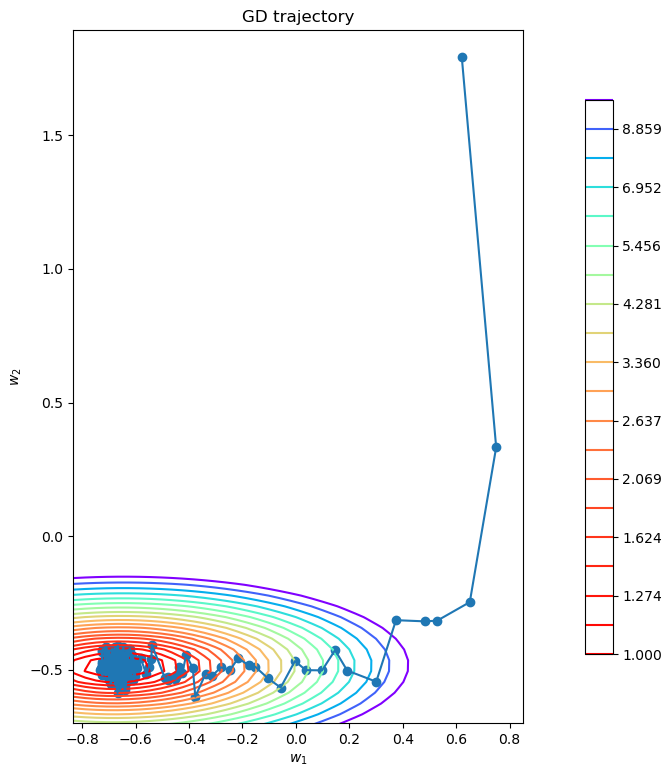

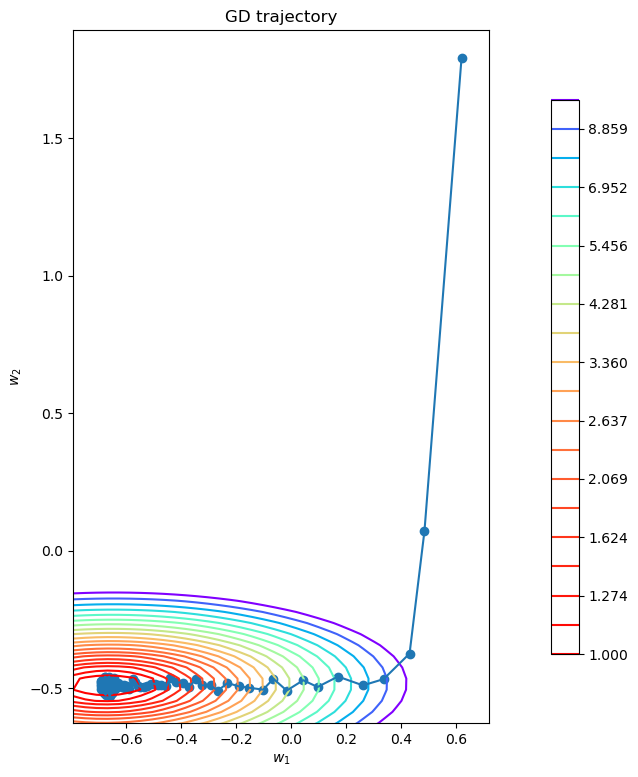

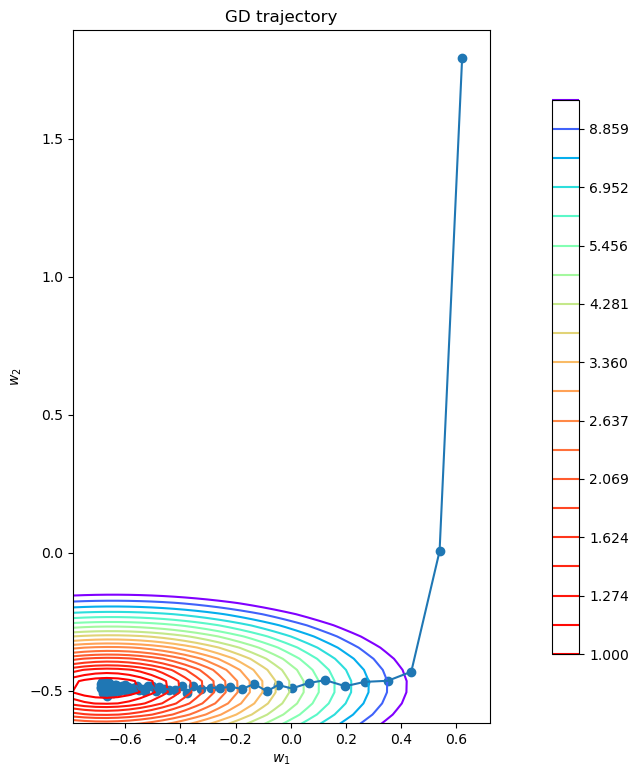

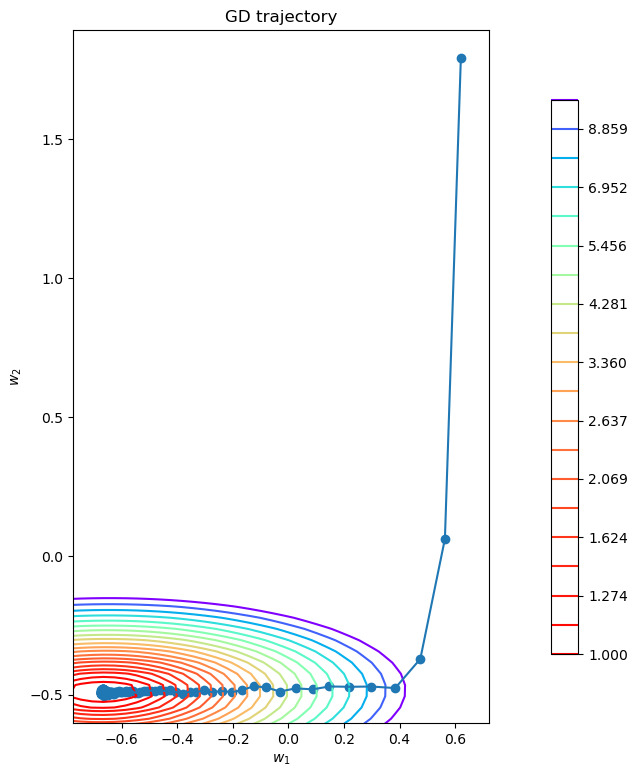

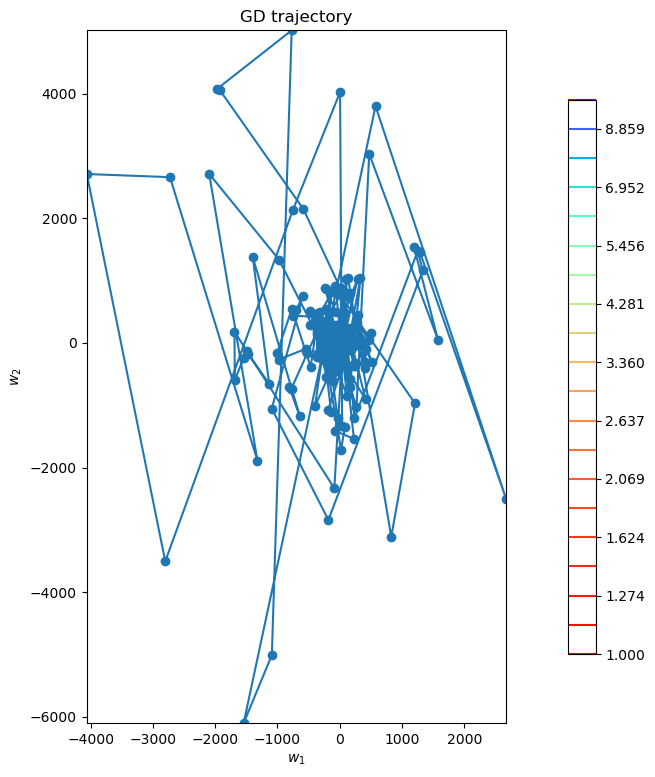

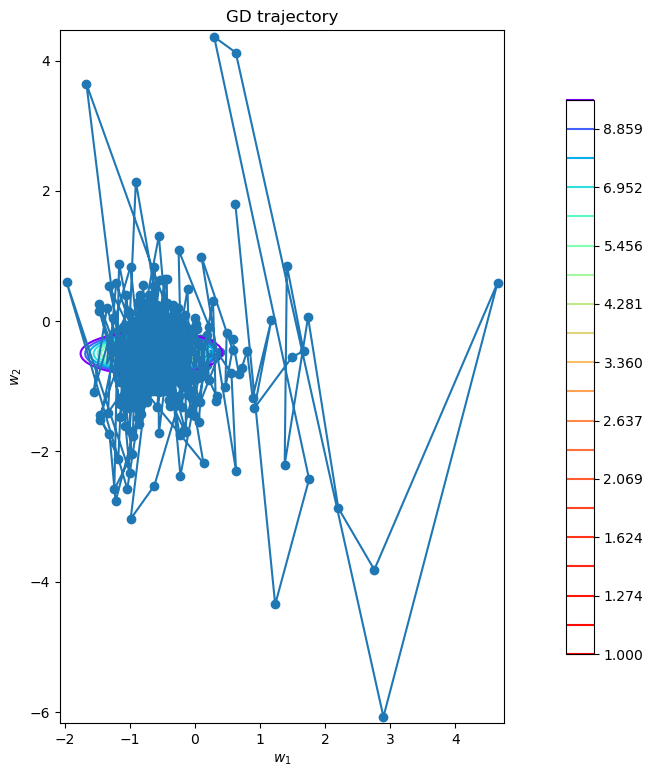

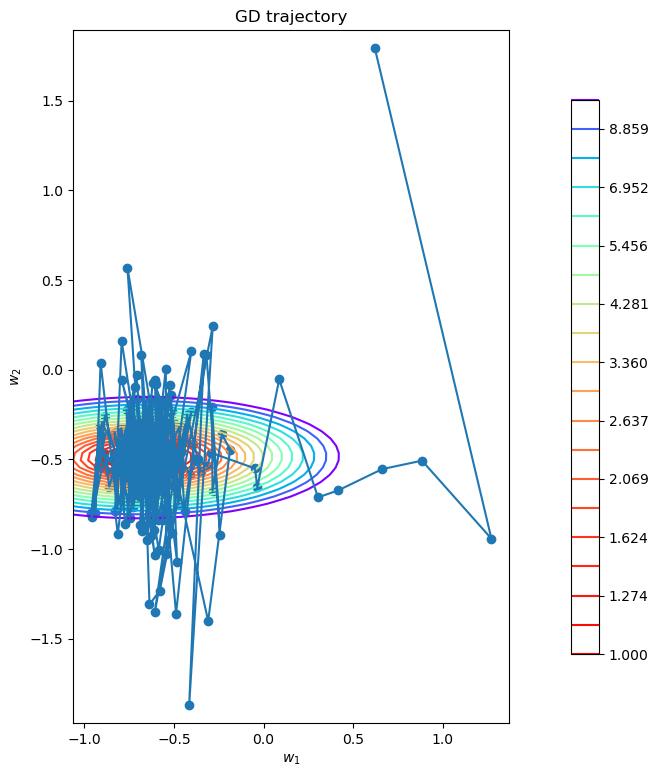

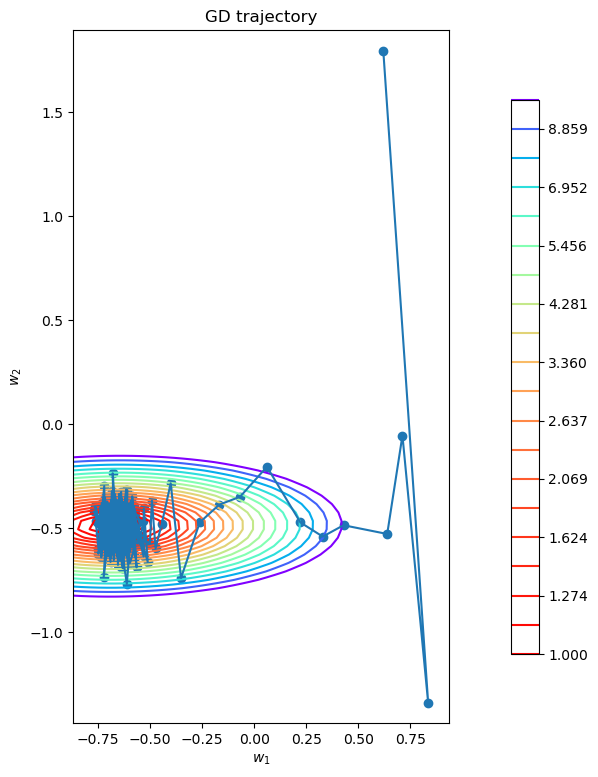

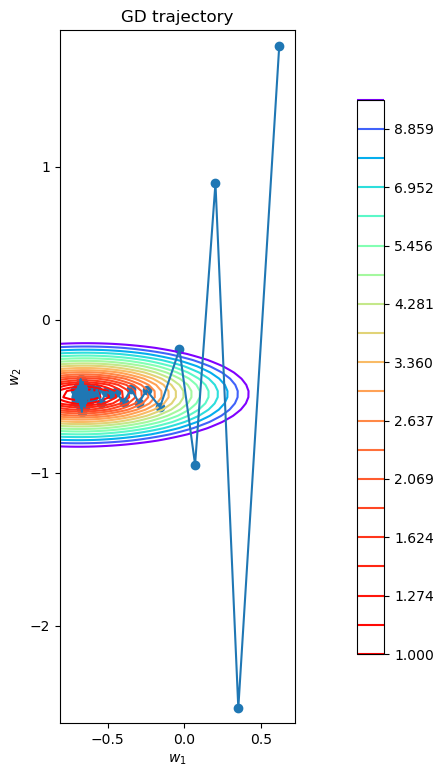

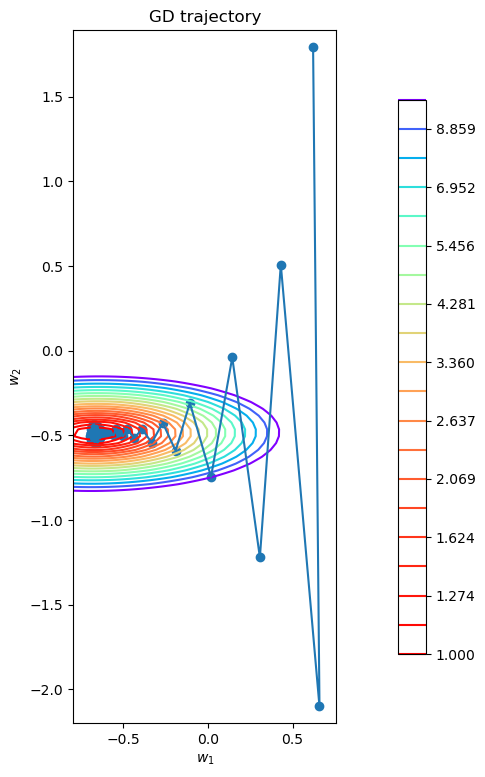

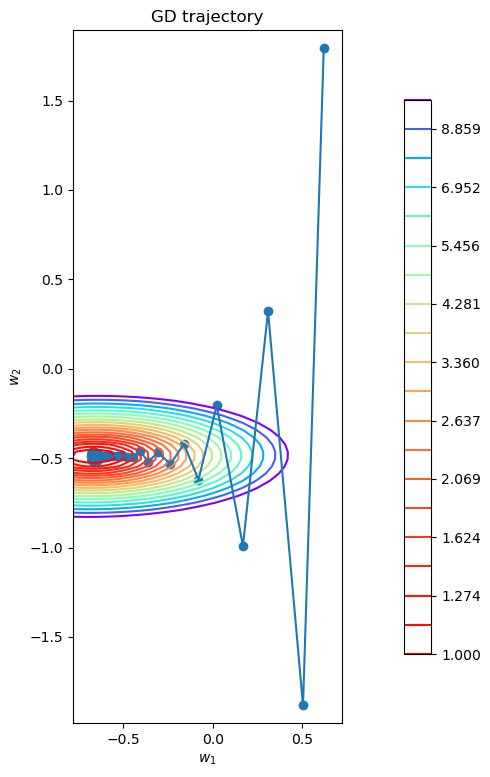

In [13]:
loss = MSELoss()
for i in lr:
    for j in batch_size:
        hist = stochastic_gradient_descent(w_init, X, y, loss, i, j, 1000)
        plot_gd(hist, X, y, loss)

При самом маленьком параметре lr (длина шага) - 0.0001 и практически любом размере подвыборки, даже если берем 1 элемент (как в классичесском стохастическом спуске), мы довольно медленно идем и не приходим в минимум. В остальных случаях при маленьком размере подвыборки мы хоть и относительно быстрее приходим в минимум, но если batch_size < 50, то наш путь довольно кривой и в случае lr = 0.01 и 0.005 при довольно маленких batch_size траектория спуска действительно выглядит хаотичной и можно сказать, что графику плохо.... Однако при lr = 0.01 размер подвыборки 10 выглядит одним из самых оптимальных, если учитывать, что время подсчета градиента для 10 переменных меньше.

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага. 

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его. 

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [14]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    psthist = list()
    psthist.append(w_init)
    for i in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batch = X[batch_indices]
        cur = psthist[-1]
        nu = lr * (1 / (1 + i)) ** p
        cur = cur - nu * loss.calc_grad(batch, y[batch_indices], cur)
        psthist.append(cur)
    return psthist
    

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

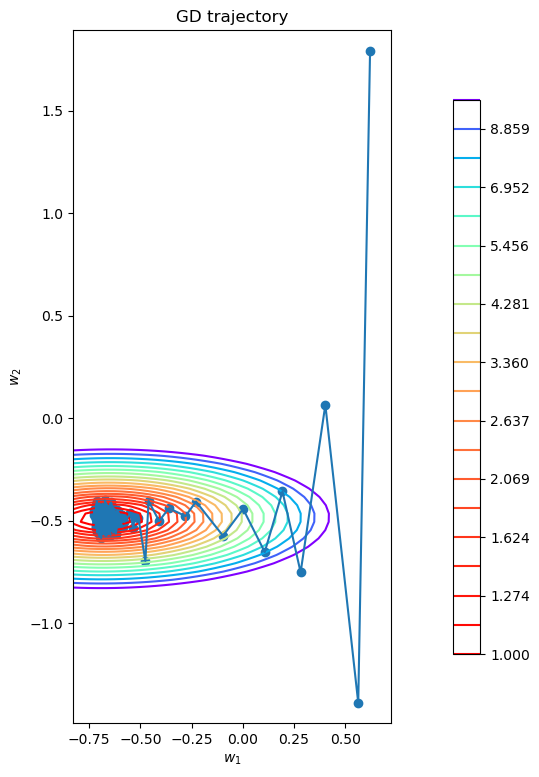

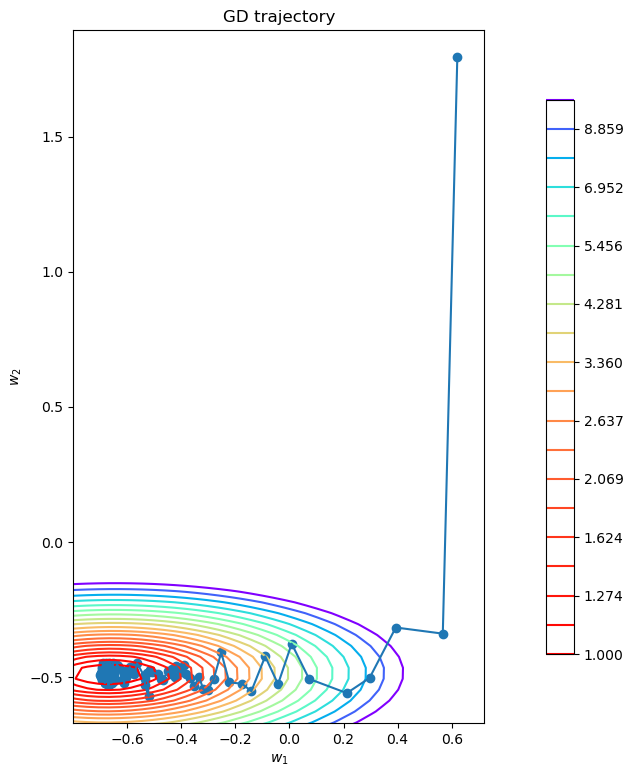

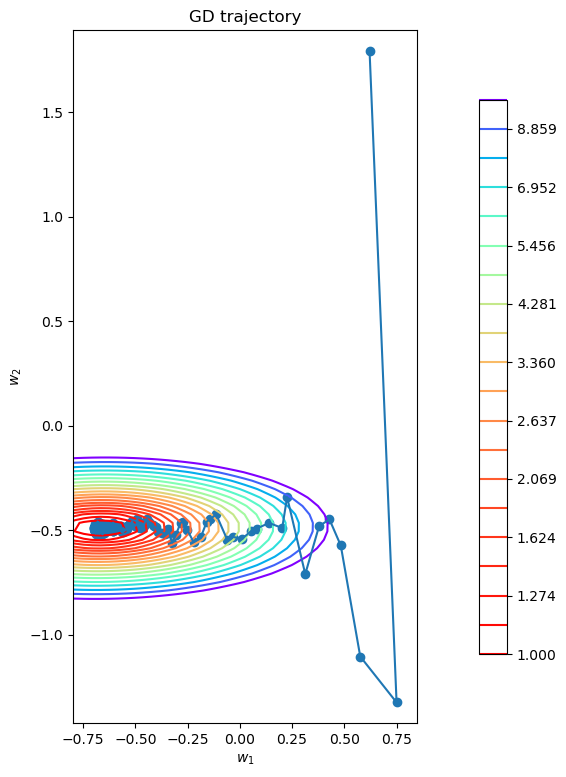

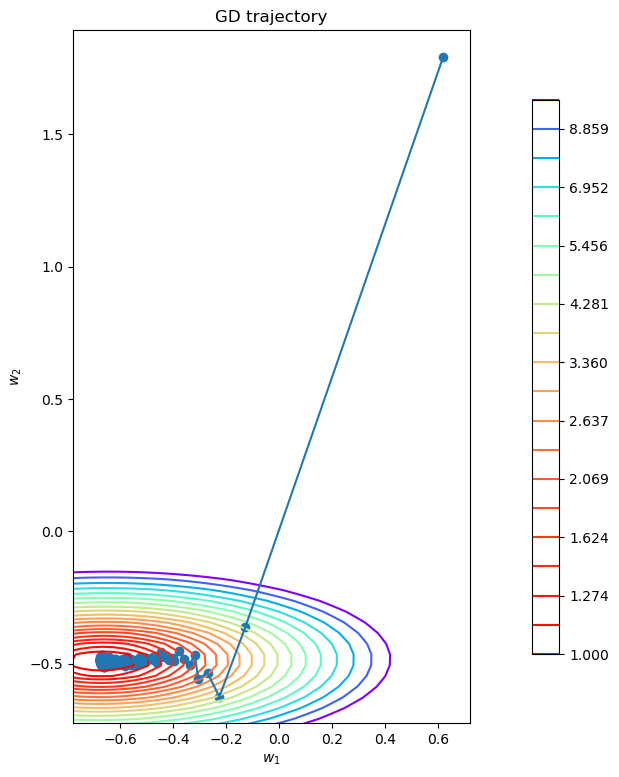

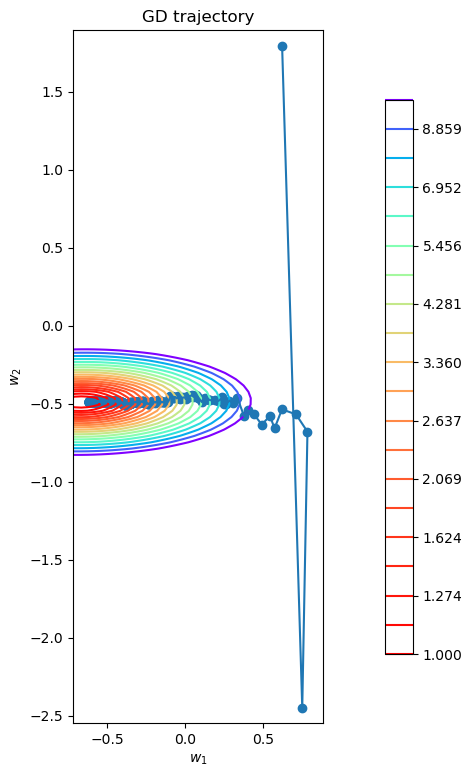

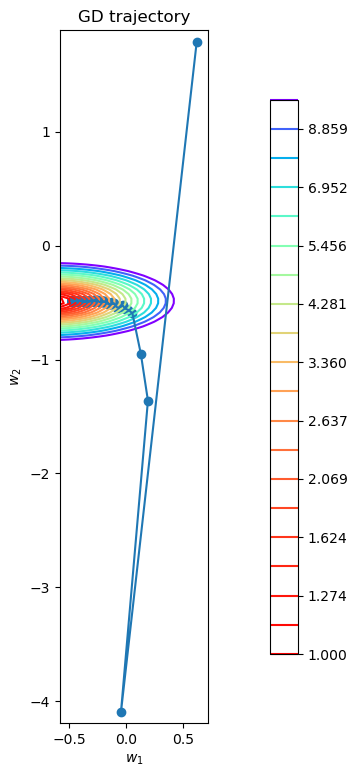

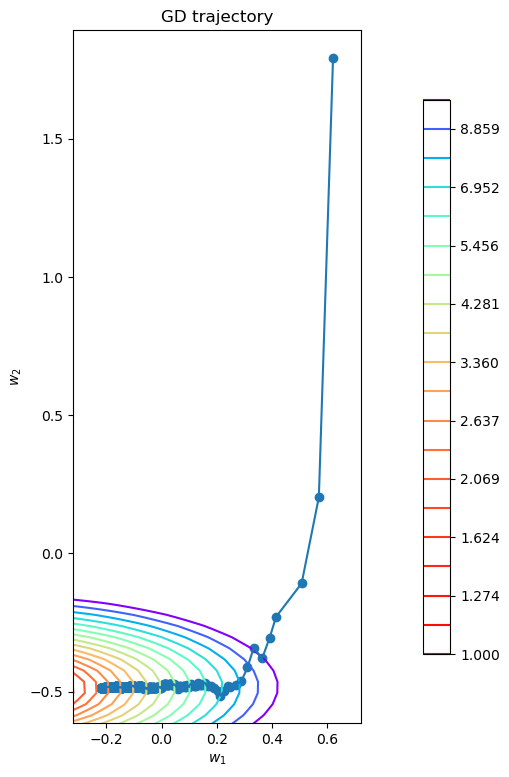

In [15]:
lr = 0.01
batch_size = 10
parr = [0.1, 0.3, 0.4, 0.5, 0.7, 0.9, 1]
loss = MSELoss()
for p in parr:
    hist = stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size, p, 1000)
    plot_gd(hist, X, y, loss)

 Одним из самых оптимальных значений выглядит p=0.05, тк при нем траектория довольно быстро приходит к "верной" и сходится в пределах линий уровня функционала ошибки.

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

In [16]:
batch_size = 10
lr = 0.01
p = 0.5
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
loss_GD = list()
GD = gradient_descent(w_init, X, y, loss, lr, 1000)
for i in range (len(GD)):
    loss_GD.append(loss.calc_loss(X, y, GD[i]))

In [18]:
loss_SGD = list()
SGD = stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size, p, 1000)
for i in range (len(SGD)):
    loss_SGD.append(loss.calc_loss(X, y, SGD[i]))

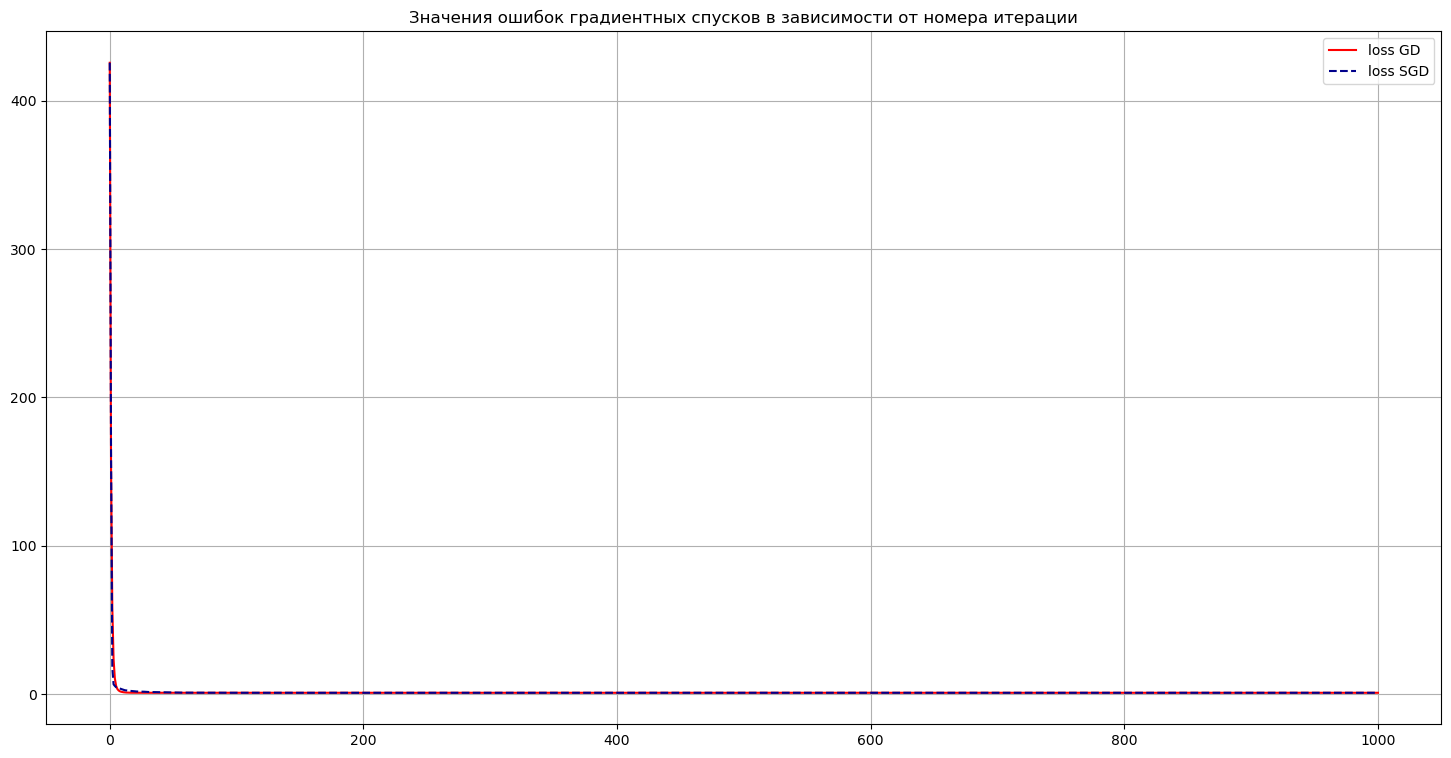

In [19]:
plt.figure(figsize=(18, 9))
x = np.arange(1001)
plt.plot(x, loss_GD, color = 'red')
plt.plot(x, loss_SGD, color = 'darkblue', linestyle = '--')
plt.legend(['loss GD','loss SGD'])
plt.title('Значения ошибок градиентных спусков в зависимости от номера итерации')
plt.grid()
plt.show()

При заданных мною параметрах практически не видна разница на графике и преимущество SGD, поскольку он и должен медленнее сходится в силу рандомности значений выборки. Но в то же время стохастический градиентный спуск достигает примерно тот же результат, что и обычный градиентный спуск примерно на 100 итерации, а на окончательной итерации loss можно считать примерно одинаковым, что показывает преимущество SGD, тк ресурсов на его выполнение требуется меньше, чем на выполнение GD.

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету, 

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [20]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        w = np.random.normal(size=(X.shape[1],))
        self.w = gradient_descent(w, X, y, self.loss, self.lr, 1000)[-1]

        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        return X.dot(self.w)

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации. 

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [21]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [22]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
    header=None,
    na_values=["?"],
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()

In [23]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [24]:
X_raw

index  0      1            2       3      4     5            6    7  \
0        0  3    NaN  alfa-romero     gas    std   two  convertible  rwd   
1        1  3    NaN  alfa-romero     gas    std   two  convertible  rwd   
2        2  1    NaN  alfa-romero     gas    std   two    hatchback  rwd   
3        3  2  164.0         audi     gas    std  four        sedan  fwd   
4        4  2  164.0         audi     gas    std  four        sedan  4wd   
..     ... ..    ...          ...     ...    ...   ...          ...  ...   
196    200 -1   95.0        volvo     gas    std  four        sedan  rwd   
197    201 -1   95.0        volvo     gas  turbo  four        sedan  rwd   
198    202 -1   95.0        volvo     gas    std  four        sedan  rwd   
199    203 -1   95.0        volvo  diesel  turbo  four        sedan  rwd   
200    204 -1   95.0        volvo     gas  turbo  four        sedan  rwd   

         8  ...    15   16    17    18    19    20     21      22  23  24  
0    front  ...  four  130  mpfi  3.47  2.68   9.0  111.0  5000.0  21  27  
1    front  ...  four  130  mpfi  3.47  2.68   9.0  111.0  5000.0  21  27  
2    front  ...   six  152  mpfi  2.68  3.47   9.0  154.0  5000.0  19  26  
3    front  ...  four  109  mpfi  3.19  3.40  10.0  102.0  5500.0  24  30  
4    front  ...  five  136  mpfi  3.19  3.40   8.0  115.0  5500.0  18  22  
..     ...  ...   ...  ...   ...   ...   ...   ...    ...     ...  ..  ..  
196  front  ...  four  141  mpfi  3.78  3.15   9.5  114.0  5400.0  23  28  
197  front  ...  four  141  mpfi  3.78  3.15   8.7  160.0  5300.0  19  25  
198  front  ...   six  173  mpfi  3.58  2.87   8.8  134.0  5500.0  18  23  
199  front  ...   six  145   idi  3.01  3.40  23.0  106.0  4800.0  26  27  
200  front  ...  four  141  mpfi  3.78  3.15   9.5  114.0  5400.0  19  25  

[201 rows x 26 columns]

In [25]:
X_raw.isnull().sum()

index     0
0         0
1        37
2         0
3         0
4         0
5         2
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        4
19        4
20        0
21        2
22        2
23        0
24        0
dtype: int64

In [26]:
X_raw.dtypes

index      int64
0          int64
1        float64
2         object
3         object
4         object
5         object
6         object
7         object
8         object
9        float64
10       float64
11       float64
12       float64
13         int64
14        object
15        object
16         int64
17        object
18       float64
19       float64
20       float64
21       float64
22       float64
23         int64
24         int64
dtype: object

Удалим столбец "индекс", поскольку он не несет никакой полезной информации.

In [27]:
X_raw.drop(columns='index', inplace=True)
X_raw

0      1            2       3      4     5            6    7      8   \
0     3    NaN  alfa-romero     gas    std   two  convertible  rwd  front   
1     3    NaN  alfa-romero     gas    std   two  convertible  rwd  front   
2     1    NaN  alfa-romero     gas    std   two    hatchback  rwd  front   
3     2  164.0         audi     gas    std  four        sedan  fwd  front   
4     2  164.0         audi     gas    std  four        sedan  4wd  front   
..   ..    ...          ...     ...    ...   ...          ...  ...    ...   
196  -1   95.0        volvo     gas    std  four        sedan  rwd  front   
197  -1   95.0        volvo     gas  turbo  four        sedan  rwd  front   
198  -1   95.0        volvo     gas    std  four        sedan  rwd  front   
199  -1   95.0        volvo  diesel  turbo  four        sedan  rwd  front   
200  -1   95.0        volvo     gas  turbo  four        sedan  rwd  front   

        9   ...    15   16    17    18    19    20     21      22  23  24  
0     88.6  ...  four  130  mpfi  3.47  2.68   9.0  111.0  5000.0  21  27  
1     88.6  ...  four  130  mpfi  3.47  2.68   9.0  111.0  5000.0  21  27  
2     94.5  ...   six  152  mpfi  2.68  3.47   9.0  154.0  5000.0  19  26  
3     99.8  ...  four  109  mpfi  3.19  3.40  10.0  102.0  5500.0  24  30  
4     99.4  ...  five  136  mpfi  3.19  3.40   8.0  115.0  5500.0  18  22  
..     ...  ...   ...  ...   ...   ...   ...   ...    ...     ...  ..  ..  
196  109.1  ...  four  141  mpfi  3.78  3.15   9.5  114.0  5400.0  23  28  
197  109.1  ...  four  141  mpfi  3.78  3.15   8.7  160.0  5300.0  19  25  
198  109.1  ...   six  173  mpfi  3.58  2.87   8.8  134.0  5500.0  18  23  
199  109.1  ...   six  145   idi  3.01  3.40  23.0  106.0  4800.0  26  27  
200  109.1  ...  four  141  mpfi  3.78  3.15   9.5  114.0  5400.0  19  25  

[201 rows x 25 columns]

Сначала заполним пропуски в числовых данных средним значением

In [28]:
#создаем маску, в которой разделяем столбцы с категориальными и вещественными значениями
mask = (X_raw.dtypes == "object").values

In [29]:
X_raw.dtypes == "object"

0     False
1     False
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9     False
10    False
11    False
12    False
13    False
14     True
15     True
16    False
17     True
18    False
19    False
20    False
21    False
22    False
23    False
24    False
dtype: bool

In [30]:
real = [0, 1, 9, 10, 11, 12, 13, 16, 18, 19, 20, 21, 22, 23, 24]

In [31]:
from sklearn.impute import SimpleImputer

In [32]:
# для вещественнозначных признаков заполним пропуски средними
real_replacer = SimpleImputer(strategy="mean")
X_raw1 = pd.DataFrame(
    data=real_replacer.fit_transform(X_raw[X_raw.columns[~mask]]), columns=X_raw[X_raw.columns[~mask]].columns
)
X_raw1

0      1      9     10    11    12      13     16    18    19    20  \
0    3.0  122.0   88.6  168.8  64.1  48.8  2548.0  130.0  3.47  2.68   9.0   
1    3.0  122.0   88.6  168.8  64.1  48.8  2548.0  130.0  3.47  2.68   9.0   
2    1.0  122.0   94.5  171.2  65.5  52.4  2823.0  152.0  2.68  3.47   9.0   
3    2.0  164.0   99.8  176.6  66.2  54.3  2337.0  109.0  3.19  3.40  10.0   
4    2.0  164.0   99.4  176.6  66.4  54.3  2824.0  136.0  3.19  3.40   8.0   
..   ...    ...    ...    ...   ...   ...     ...    ...   ...   ...   ...   
196 -1.0   95.0  109.1  188.8  68.9  55.5  2952.0  141.0  3.78  3.15   9.5   
197 -1.0   95.0  109.1  188.8  68.8  55.5  3049.0  141.0  3.78  3.15   8.7   
198 -1.0   95.0  109.1  188.8  68.9  55.5  3012.0  173.0  3.58  2.87   8.8   
199 -1.0   95.0  109.1  188.8  68.9  55.5  3217.0  145.0  3.01  3.40  23.0   
200 -1.0   95.0  109.1  188.8  68.9  55.5  3062.0  141.0  3.78  3.15   9.5   

        21      22    23    24  
0    111.0  5000.0  21.0  27.0  
1    111.0  5000.0  21.0  27.0  
2    154.0  5000.0  19.0  26.0  
3    102.0  5500.0  24.0  30.0  
4    115.0  5500.0  18.0  22.0  
..     ...     ...   ...   ...  
196  114.0  5400.0  23.0  28.0  
197  160.0  5300.0  19.0  25.0  
198  134.0  5500.0  18.0  23.0  
199  106.0  4800.0  26.0  27.0  
200  114.0  5400.0  19.0  25.0  

[201 rows x 15 columns]

In [33]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
196    16845.0
197    19045.0
198    21485.0
199    22470.0
200    22625.0
Name: 25, Length: 201, dtype: float64

In [34]:
##y = (y - y.mean()) / y.std()

Заметим, что среди категориальных признаков пропуски есть только в столбце под номером 5, а также их относительно немного общего количества объектов - 2 из 201, так что заменим их на самое часто встречающееся значение в этом столбце.

In [35]:
cat_replacer = SimpleImputer(strategy="most_frequent")
X_raw2 = pd.DataFrame(
    data=cat_replacer.fit_transform(X_raw[X_raw.columns[mask]]), columns=X_raw[X_raw.columns[mask]].columns
)
X_raw2

2       3      4     5            6    7      8    14    15  \
0    alfa-romero     gas    std   two  convertible  rwd  front  dohc  four   
1    alfa-romero     gas    std   two  convertible  rwd  front  dohc  four   
2    alfa-romero     gas    std   two    hatchback  rwd  front  ohcv   six   
3           audi     gas    std  four        sedan  fwd  front   ohc  four   
4           audi     gas    std  four        sedan  4wd  front   ohc  five   
..           ...     ...    ...   ...          ...  ...    ...   ...   ...   
196        volvo     gas    std  four        sedan  rwd  front   ohc  four   
197        volvo     gas  turbo  four        sedan  rwd  front   ohc  four   
198        volvo     gas    std  four        sedan  rwd  front  ohcv   six   
199        volvo  diesel  turbo  four        sedan  rwd  front   ohc   six   
200        volvo     gas  turbo  four        sedan  rwd  front   ohc  four   

       17  
0    mpfi  
1    mpfi  
2    mpfi  
3    mpfi  
4    mpfi  
..    ...  
196  mpfi  
197  mpfi  
198  mpfi  
199   idi  
200  mpfi  

[201 rows x 10 columns]

In [36]:
X_nomiss = pd.concat([X_raw1, X_raw2], axis=1)
X_nomiss

0      1      9      10    11    12      13     16    18    19  ...  \
0    3.0  122.0   88.6  168.8  64.1  48.8  2548.0  130.0  3.47  2.68  ...   
1    3.0  122.0   88.6  168.8  64.1  48.8  2548.0  130.0  3.47  2.68  ...   
2    1.0  122.0   94.5  171.2  65.5  52.4  2823.0  152.0  2.68  3.47  ...   
3    2.0  164.0   99.8  176.6  66.2  54.3  2337.0  109.0  3.19  3.40  ...   
4    2.0  164.0   99.4  176.6  66.4  54.3  2824.0  136.0  3.19  3.40  ...   
..   ...    ...    ...    ...   ...   ...     ...    ...   ...   ...  ...   
196 -1.0   95.0  109.1  188.8  68.9  55.5  2952.0  141.0  3.78  3.15  ...   
197 -1.0   95.0  109.1  188.8  68.8  55.5  3049.0  141.0  3.78  3.15  ...   
198 -1.0   95.0  109.1  188.8  68.9  55.5  3012.0  173.0  3.58  2.87  ...   
199 -1.0   95.0  109.1  188.8  68.9  55.5  3217.0  145.0  3.01  3.40  ...   
200 -1.0   95.0  109.1  188.8  68.9  55.5  3062.0  141.0  3.78  3.15  ...   

              2       3      4     5            6    7      8     14    15  \
0    alfa-romero     gas    std   two  convertible  rwd  front  dohc  four   
1    alfa-romero     gas    std   two  convertible  rwd  front  dohc  four   
2    alfa-romero     gas    std   two    hatchback  rwd  front  ohcv   six   
3           audi     gas    std  four        sedan  fwd  front   ohc  four   
4           audi     gas    std  four        sedan  4wd  front   ohc  five   
..           ...     ...    ...   ...          ...  ...    ...   ...   ...   
196        volvo     gas    std  four        sedan  rwd  front   ohc  four   
197        volvo     gas  turbo  four        sedan  rwd  front   ohc  four   
198        volvo     gas    std  four        sedan  rwd  front  ohcv   six   
199        volvo  diesel  turbo  four        sedan  rwd  front   ohc   six   
200        volvo     gas  turbo  four        sedan  rwd  front   ohc  four   

       17  
0    mpfi  
1    mpfi  
2    mpfi  
3    mpfi  
4    mpfi  
..    ...  
196  mpfi  
197  mpfi  
198  mpfi  
199   idi  
200  mpfi  

[201 rows x 25 columns]

Закодируем категориальные признаки с помощью one-hot кодирования

In [37]:
X = pd.get_dummies(X_nomiss)
X

0      1      9     10    11    12      13     16    18    19  ...  \
0    3.0  122.0   88.6  168.8  64.1  48.8  2548.0  130.0  3.47  2.68  ...   
1    3.0  122.0   88.6  168.8  64.1  48.8  2548.0  130.0  3.47  2.68  ...   
2    1.0  122.0   94.5  171.2  65.5  52.4  2823.0  152.0  2.68  3.47  ...   
3    2.0  164.0   99.8  176.6  66.2  54.3  2337.0  109.0  3.19  3.40  ...   
4    2.0  164.0   99.4  176.6  66.4  54.3  2824.0  136.0  3.19  3.40  ...   
..   ...    ...    ...    ...   ...   ...     ...    ...   ...   ...  ...   
196 -1.0   95.0  109.1  188.8  68.9  55.5  2952.0  141.0  3.78  3.15  ...   
197 -1.0   95.0  109.1  188.8  68.8  55.5  3049.0  141.0  3.78  3.15  ...   
198 -1.0   95.0  109.1  188.8  68.9  55.5  3012.0  173.0  3.58  2.87  ...   
199 -1.0   95.0  109.1  188.8  68.9  55.5  3217.0  145.0  3.01  3.40  ...   
200 -1.0   95.0  109.1  188.8  68.9  55.5  3062.0  141.0  3.78  3.15  ...   

     15_twelve  15_two  17_1bbl  17_2bbl  17_4bbl  17_idi  17_mfi  17_mpfi  \
0            0       0        0        0        0       0       0        1   
1            0       0        0        0        0       0       0        1   
2            0       0        0        0        0       0       0        1   
3            0       0        0        0        0       0       0        1   
4            0       0        0        0        0       0       0        1   
..         ...     ...      ...      ...      ...     ...     ...      ...   
196          0       0        0        0        0       0       0        1   
197          0       0        0        0        0       0       0        1   
198          0       0        0        0        0       0       0        1   
199          0       0        0        0        0       1       0        0   
200          0       0        0        0        0       0       0        1   

     17_spdi  17_spfi  
0          0        0  
1          0        0  
2          0        0  
3          0        0  
4          0        0  
..       ...      ...  
196        0        0  
197        0        0  
198        0        0  
199        0        0  
200        0        0  

[201 rows x 74 columns]

 Разделим на тренировочную и тестовую выборки

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

In [40]:
X_train.isnull().any().any()

False

Отнормируем выборки числовые признаки с помощью StandardScaler-а

In [41]:
X_train.columns

Index([                0,                 1,                 9,
                      10,                11,                12,
                      13,                16,                18,
                      19,                20,                21,
                      22,                23,                24,
         '2_alfa-romero',          '2_audi',           '2_bmw',
           '2_chevrolet',         '2_dodge',         '2_honda',
               '2_isuzu',        '2_jaguar',         '2_mazda',
       '2_mercedes-benz',       '2_mercury',    '2_mitsubishi',
              '2_nissan',        '2_peugot',      '2_plymouth',
             '2_porsche',       '2_renault',          '2_saab',
              '2_subaru',        '2_toyota',    '2_volkswagen',
               '2_volvo',        '3_diesel',           '3_gas',
                 '4_std',         '4_turbo',          '5_four',
                 '5_two',   '6_convertible',       '6_hardtop',
           '6_hatchback',         '6_sed

In [42]:
real = [0, 1, 9, 10, 11, 12, 13, 16, 18, 19, 20, 21, 22, 23, 24]
cat = ['2_alfa-romero',          '2_audi',           '2_bmw',
           '2_chevrolet',         '2_dodge',         '2_honda',
               '2_isuzu',        '2_jaguar',         '2_mazda',
       '2_mercedes-benz',       '2_mercury',    '2_mitsubishi',
              '2_nissan',        '2_peugot',      '2_plymouth',
             '2_porsche',       '2_renault',          '2_saab',
              '2_subaru',        '2_toyota',    '2_volkswagen',
               '2_volvo',        '3_diesel',           '3_gas',
                 '4_std',         '4_turbo',          '5_four',
                 '5_two',   '6_convertible',       '6_hardtop',
           '6_hatchback',         '6_sedan',         '6_wagon',
                 '7_4wd',           '7_fwd',           '7_rwd',
               '8_front',          '8_rear',         '14_dohc',
                  '14_l',          '14_ohc',         '14_ohcf',
               '14_ohcv',        '14_rotor',        '15_eight',
               '15_five',         '15_four',          '15_six',
              '15_three',       '15_twelve',          '15_two',
               '17_1bbl',         '17_2bbl',         '17_4bbl',
                '17_idi',          '17_mfi',         '17_mpfi',
               '17_spdi',         '17_spfi']

In [43]:
X2 = X_train[cat]
X2.reset_index(inplace=True)
X2.drop(columns='index', inplace=True)
X2

2_alfa-romero  2_audi  2_bmw  2_chevrolet  2_dodge  2_honda  2_isuzu  \
0                0       0      0            0        0        0        0   
1                0       0      0            0        0        0        0   
2                0       0      0            0        0        1        0   
3                0       0      0            0        0        0        0   
4                0       0      0            0        0        0        0   
..             ...     ...    ...          ...      ...      ...      ...   
155              0       0      0            0        0        0        0   
156              0       0      0            0        0        0        0   
157              0       0      0            0        0        1        0   
158              0       0      0            0        0        0        0   
159              0       0      1            0        0        0        0   

     2_jaguar  2_mazda  2_mercedes-benz  ...  15_twelve  15_two  17_1bbl  \
0           0        0                0  ...          0       0        0   
1           0        0                0  ...          0       0        0   
2           0        0                0  ...          0       0        1   
3           0        0                0  ...          0       0        0   
4           0        0                0  ...          0       0        0   
..        ...      ...              ...  ...        ...     ...      ...   
155         0        0                0  ...          0       0        0   
156         0        0                0  ...          0       0        0   
157         0        0                0  ...          0       0        1   
158         0        0                0  ...          0       0        0   
159         0        0                0  ...          0       0        0   

     17_2bbl  17_4bbl  17_idi  17_mfi  17_mpfi  17_spdi  17_spfi  
0          1        0       0       0        0        0        0  
1          0        0       0       0        1        0        0  
2          0        0       0       0        0        0        0  
3          1        0       0       0        0        0        0  
4          0        0       1       0        0        0        0  
..       ...      ...     ...     ...      ...      ...      ...  
155        0        0       0       0        1        0        0  
156        0        0       0       0        1        0        0  
157        0        0       0       0        0        0        0  
158        0        0       1       0        0        0        0  
159        0        0       0       0        1        0        0  

[160 rows x 59 columns]

In [44]:
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()

X1 = X_train[real].copy()
X1 = pd.DataFrame(data=normalizer.fit_transform(X1))
X1

0         1         2         3         4         5         6   \
0    0.197588 -0.046271 -0.832321 -1.364045 -0.987815 -1.282845 -1.220658   
1   -0.613030  0.049876  0.248275  0.738639  0.502320  0.497662  0.025971   
2    0.197588 -0.623151 -0.832321 -1.958990 -0.891678 -0.537516 -1.377212   
3    0.197588  1.524126 -0.703294 -0.434952 -0.891678 -0.537516 -0.735536   
4   -0.613030  0.049876  0.248275  0.502291  0.502320  0.497662  0.056896   
..        ...       ...       ...       ...       ...       ...       ...   
155 -2.234265 -0.559053  0.877278  1.203185  0.646526  0.953140  0.744958   
156 -1.423647 -1.488471  0.877278  1.203185  0.646526  1.491433  0.936301   
157  0.197588 -0.623151 -0.832321 -1.958990 -0.891678 -0.537516 -1.147213   
158  1.008206 -0.847493 -0.251702 -0.190454 -0.170644  0.746105 -0.445622   
159 -0.613030  0.049876  0.748252  1.610682  0.983008 -0.082038  1.605036   

           7         8         9         10        11        12        13  \
0   -0.888149 -1.352974 -0.097386 -0.195426 -0.961846  0.756021  1.908154   
1   -0.415878 -0.518227  0.460557 -0.295789 -0.386148  0.756021 -0.033370   
2   -1.161568 -1.580632 -0.622509 -0.019790 -1.192124  0.756021  2.069947   
3   -0.689298 -0.518227 -0.753789 -0.295789 -0.904276 -0.652111  0.613805   
4   -0.714154 -1.201201  0.460557  3.216917 -0.961846 -1.255596  1.260979   
..        ...       ...       ...       ...       ...       ...       ...   
155  0.379525  1.720412 -0.359947 -0.170335  0.362258  0.554860 -0.195164   
156  0.379525  1.720412 -0.359947 -0.170335  0.362258  0.554860 -0.356957   
157 -0.838436 -1.580632  0.493377 -0.245607 -0.731567  1.761830  0.775598   
158 -0.714154 -1.201201  0.460557  3.216917 -0.961846 -1.255596  1.908154   
159  2.069757  1.113323  0.427737 -0.546696  2.319629  0.554860 -1.489513   

           14  
0    1.595015  
1    0.059501  
2    1.748567  
3    0.520155  
4    1.134361  
..        ...  
155 -0.401153  
156 -0.401153  
157  0.520155  
158  1.748567  
159 -1.322462  

[160 rows x 15 columns]

In [45]:
X_train

0      1      9     10    11    12      13     16    18    19  ...  \
115  1.0  119.0   93.7  157.3  63.8  50.8  1918.0   90.0  2.97  3.23  ...   
189  0.0  122.0  100.4  183.1  66.9  55.1  2563.0  109.0  3.19  3.40  ...   
31   1.0  101.0   93.7  150.0  64.0  52.6  1837.0   79.0  2.91  3.07  ...   
159  1.0  168.0   94.5  168.7  64.0  52.6  2169.0   98.0  3.19  3.03  ...   
188  0.0  122.0  100.4  180.2  66.9  55.1  2579.0   97.0  3.01  3.40  ...   
..   ...    ...    ...    ...   ...   ...     ...    ...   ...   ...  ...   
192 -2.0  103.0  104.3  188.8  67.2  56.2  2935.0  141.0  3.78  3.15  ...   
191 -1.0   74.0  104.3  188.8  67.2  57.5  3034.0  141.0  3.78  3.15  ...   
33   1.0  101.0   93.7  150.0  64.0  52.6  1956.0   92.0  2.91  3.41  ...   
183  2.0   94.0   97.3  171.7  65.5  55.7  2319.0   97.0  3.01  3.40  ...   
15   0.0  122.0  103.5  193.8  67.9  53.7  3380.0  209.0  3.62  3.39  ...   

     15_twelve  15_two  17_1bbl  17_2bbl  17_4bbl  17_idi  17_mfi  17_mpfi  \
115          0       0        0        1        0       0       0        0   
189          0       0        0        0        0       0       0        1   
31           0       0        1        0        0       0       0        0   
159          0       0        0        1        0       0       0        0   
188          0       0        0        0        0       1       0        0   
..         ...     ...      ...      ...      ...     ...     ...      ...   
192          0       0        0        0        0       0       0        1   
191          0       0        0        0        0       0       0        1   
33           0       0        1        0        0       0       0        0   
183          0       0        0        0        0       1       0        0   
15           0       0        0        0        0       0       0        1   

     17_spdi  17_spfi  
115        0        0  
189        0        0  
31         0        0  
159        0        0  
188        0        0  
..       ...      ...  
192        0        0  
191        0        0  
33         0        0  
183        0        0  
15         0        0  

[160 rows x 74 columns]

In [46]:
X_train = pd.concat([X1, X2], axis=1)
X_train

0         1         2         3         4         5         6  \
0    0.197588 -0.046271 -0.832321 -1.364045 -0.987815 -1.282845 -1.220658   
1   -0.613030  0.049876  0.248275  0.738639  0.502320  0.497662  0.025971   
2    0.197588 -0.623151 -0.832321 -1.958990 -0.891678 -0.537516 -1.377212   
3    0.197588  1.524126 -0.703294 -0.434952 -0.891678 -0.537516 -0.735536   
4   -0.613030  0.049876  0.248275  0.502291  0.502320  0.497662  0.056896   
..        ...       ...       ...       ...       ...       ...       ...   
155 -2.234265 -0.559053  0.877278  1.203185  0.646526  0.953140  0.744958   
156 -1.423647 -1.488471  0.877278  1.203185  0.646526  1.491433  0.936301   
157  0.197588 -0.623151 -0.832321 -1.958990 -0.891678 -0.537516 -1.147213   
158  1.008206 -0.847493 -0.251702 -0.190454 -0.170644  0.746105 -0.445622   
159 -0.613030  0.049876  0.748252  1.610682  0.983008 -0.082038  1.605036   

            7         8         9  ...  15_twelve  15_two  17_1bbl  17_2bbl  \
0   -0.888149 -1.352974 -0.097386  ...          0       0        0        1   
1   -0.415878 -0.518227  0.460557  ...          0       0        0        0   
2   -1.161568 -1.580632 -0.622509  ...          0       0        1        0   
3   -0.689298 -0.518227 -0.753789  ...          0       0        0        1   
4   -0.714154 -1.201201  0.460557  ...          0       0        0        0   
..        ...       ...       ...  ...        ...     ...      ...      ...   
155  0.379525  1.720412 -0.359947  ...          0       0        0        0   
156  0.379525  1.720412 -0.359947  ...          0       0        0        0   
157 -0.838436 -1.580632  0.493377  ...          0       0        1        0   
158 -0.714154 -1.201201  0.460557  ...          0       0        0        0   
159  2.069757  1.113323  0.427737  ...          0       0        0        0   

     17_4bbl  17_idi  17_mfi  17_mpfi  17_spdi  17_spfi  
0          0       0       0        0        0        0  
1          0       0       0        1        0        0  
2          0       0       0        0        0        0  
3          0       0       0        0        0        0  
4          0       1       0        0        0        0  
..       ...     ...     ...      ...      ...      ...  
155        0       0       0        1        0        0  
156        0       0       0        1        0        0  
157        0       0       0        0        0        0  
158        0       1       0        0        0        0  
159        0       0       0        1        0        0  

[160 rows x 74 columns]

In [47]:
X2t = X_test[cat]
X2t.reset_index(inplace=True)
X2t.drop(columns='index', inplace=True)
X2t.head()

2_alfa-romero  2_audi  2_bmw  2_chevrolet  2_dodge  2_honda  2_isuzu  \
0              0       0      0            0        0        0        0   
1              0       0      0            0        0        0        0   
2              0       0      0            0        0        0        0   
3              0       0      0            0        0        0        0   
4              0       0      0            0        0        0        0   

   2_jaguar  2_mazda  2_mercedes-benz  ...  15_twelve  15_two  17_1bbl  \
0         0        0                0  ...          0       0        0   
1         0        0                0  ...          0       0        0   
2         0        0                0  ...          0       0        0   
3         0        0                0  ...          0       0        0   
4         0        0                0  ...          0       0        0   

   17_2bbl  17_4bbl  17_idi  17_mfi  17_mpfi  17_spdi  17_spfi  
0        1        0       0       0        0        0        0  
1        0        0       0       0        1        0        0  
2        0        0       0       0        1        0        0  
3        1        0       0       0        0        0        0  
4        0        0       1       0        0        0        0  

[5 rows x 59 columns]

In [48]:
X1t = X_test[real].copy()
X1t = pd.DataFrame(data=normalizer.fit_transform(X1t))
X1t.head()

0         1         2         3         4         5         6   \
0  0.654573 -1.330140 -0.967771 -1.419901 -1.032519  0.987495 -0.665842   
1  0.654573 -0.710416  0.101634  0.951800  0.222145  1.148959  0.524676   
2  1.443911  0.647076  0.101634  0.951800  0.222145  1.148959  0.250092   
3 -0.924103 -1.153076 -0.285564 -0.108585 -0.289015 -0.102392 -0.567777   
4 -0.924103 -1.094055 -0.525259 -0.691392 -0.753705 -0.183125 -0.597196   

         7         8         9         10        11        12        13  \
0 -0.511936  0.970926 -1.715579 -0.349108 -0.847231 -1.787168  0.128324   
1 -0.226814  0.686583 -0.498450 -0.274688  1.085787  1.054148 -0.840861   
2 -0.226814 -2.867699 -3.328983 -0.200268 -0.025143  0.408394 -0.563951   
3 -0.511936  0.970926 -1.715579 -0.274688 -0.647264 -0.753962  0.405234   
4 -0.468071 -0.273073  0.294099  3.074205 -1.224948 -1.528867  1.789785   

         14  
0  0.003124  
1 -0.637320  
2 -0.381142  
3  0.131213  
4  2.052544

In [49]:
X_test = pd.concat([X1t, X2t], axis = 1)
X_test.head()

0         1         2         3         4         5         6  \
0  0.654573 -1.330140 -0.967771 -1.419901 -1.032519  0.987495 -0.665842   
1  0.654573 -0.710416  0.101634  0.951800  0.222145  1.148959  0.524676   
2  1.443911  0.647076  0.101634  0.951800  0.222145  1.148959  0.250092   
3 -0.924103 -1.153076 -0.285564 -0.108585 -0.289015 -0.102392 -0.567777   
4 -0.924103 -1.094055 -0.525259 -0.691392 -0.753705 -0.183125 -0.597196   

          7         8         9  ...  15_twelve  15_two  17_1bbl  17_2bbl  \
0 -0.511936  0.970926 -1.715579  ...          0       0        0        1   
1 -0.226814  0.686583 -0.498450  ...          0       0        0        0   
2 -0.226814 -2.867699 -3.328983  ...          0       0        0        0   
3 -0.511936  0.970926 -1.715579  ...          0       0        0        1   
4 -0.468071 -0.273073  0.294099  ...          0       0        0        0   

   17_4bbl  17_idi  17_mfi  17_mpfi  17_spdi  17_spfi  
0        0       0       0        0        0        0  
1        0       0       0        1        0        0  
2        0       0       0        1        0        0  
3        0       0       0        0        0        0  
4        0       1       0        0        0        0  

[5 rows x 74 columns]

**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [50]:
X_train = X_train.to_numpy()
y_train

115     5572.0
189    12290.0
31      5399.0
159     8058.0
188    13845.0
        ...   
192    15985.0
191    13415.0
33      7129.0
183     9495.0
15     41315.0
Name: 25, Length: 160, dtype: float64

In [51]:
linear_regression.fit(X_train, y_train)

In [52]:
linear_regression.predict(X_train)

array([ 6270.54158321, 11586.19809605,  5735.59425566,  7558.5135378 ,
       12071.06983773, 27949.28070152,  8033.35077101,  6324.21632385,
        6367.67235892, 12591.97157997,  6478.97984483,  8240.67125072,
        6197.02228509, 10023.74772401, 10023.14039618,  6889.86702131,
       12833.20165348, 22744.94433957, 12250.23372056, 24612.51907229,
        8080.66753085, 13089.19618851,  8707.62216103, 19205.21942712,
       11730.99644668,  7225.2735428 , 20224.90755582, 14340.84844352,
       41570.62216222, 15168.78387733, 16959.2407688 , 10797.43074564,
        8509.91346902, 10913.21831093, 13716.39437965, 18428.20659671,
       13088.42826701, 36473.1996233 ,  6480.02744527,  7914.27359685,
       12288.13717996,  7827.52014785, 18180.76431993,  8822.51199359,
       12775.27121733,  6342.62630008, 33257.86663723, 18649.29761529,
        7019.81417866, 10573.8445201 ,  6756.16762307,  7710.98704861,
       15892.65345095,  9645.11941962,  6578.95959666, 17846.86308017,
      

In [53]:
y_train

115     5572.0
189    12290.0
31      5399.0
159     8058.0
188    13845.0
        ...   
192    15985.0
191    13415.0
33      7129.0
183     9495.0
15     41315.0
Name: 25, Length: 160, dtype: float64

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [54]:
from sklearn.metrics import mean_squared_error
X_test = X_test.to_numpy()
mse1 = [mean_squared_error(y_train, linear_regression.predict(X_train)),
mean_squared_error(y_test, linear_regression.predict(X_test))]
mse1

[2083395.007883281, 11662036.388049815]

Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [55]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        return ((X.dot(w) - y) ** 2).sum() / y.shape[0] + self.coef * (w[:-1] ** 2).sum()

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        w1 = w.copy()
        w1[-1] = 0
        return 2 * X.T.dot(X.dot(w) - y) / y.shape[0] + 2 * self.coef * w1

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [56]:
linear_regression = LinearRegression(MSEL2Loss(0.1))

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации. 

In [57]:
er = list()
for i in range(1, 100):
    linear_regression = LinearRegression(MSEL2Loss(i / 100))
    linear_regression.fit(X_train, y_train)
    er.append([mean_squared_error(y_train, linear_regression.predict(X_train)),
    mean_squared_error(y_test, linear_regression.predict(X_test))])
er1 = pd.DataFrame(er)
er1

0             1
0   2.618737e+06  9.254725e+06
1   3.139763e+06  8.271580e+06
2   3.553758e+06  7.709843e+06
3   3.895978e+06  7.351530e+06
4   4.191565e+06  7.114773e+06
..           ...           ...
94  1.205304e+07  9.166235e+06
95  1.209841e+07  9.187855e+06
96  1.214351e+07  9.209355e+06
97  1.218832e+07  9.230740e+06
98  1.223286e+07  9.252011e+06

[99 rows x 2 columns]

In [58]:
er1[er1[1] == er1[1].min()]

0             1
10  5.499428e+06  6.720428e+06

In [59]:
mse2 = er[0]

 Выходит, что минимальная ошибка  при i = 1, то есть коэффициент 0.11  для минимальной ошибки на тренировочной выборке

In [60]:
print('Показатели с регуляризацией:', mse2)
print('Показатели без регуляризации:', mse1)

Показатели с регуляризацией: [2618737.0329006873, 9254725.140398946]
Показатели без регуляризации: [2083395.007883281, 11662036.388049815]


In [61]:
(mse1[1] - mse2[1]) / mse1[0] * 100

115.54751924344319

In [62]:
(mse2[0] - mse1[0]) / mse1[0] * 100

25.695656512171023

Значения ошибки на тренировочной выборке вышло лучше без регулязации, возможно, потому что когда брали значения - рассматривали минимум только по ошибке на тестовой выборке, а не двух одновременно. Но в то же время показатель ошибки на тестовой выборке улучшился примерно на 172%

В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [63]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        z = X.dot(w) - y
        small = abs(z) < self.eps
        mse = 0.5 * z ** 2
        mae = self.eps * (abs(z) - 0.5 * self.eps)
        loss = np.where(small, mse, mae).mean()
        return loss
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        z = X.dot(w) - y
        small = abs(z) < self.eps
        sm = z
        big = self.eps * np.sign(z)
        grad = np.where(small, sm, big)
        return X.T.dot(grad) / y.shape[0]
        

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [79]:
linear_regression = LinearRegression(HuberLoss(981))
linear_regression.fit(X_train, y_train)
linear_regression.w

array([ 5.21099502e+02, -6.09588179e+01,  9.07372252e+02, -7.40161211e+02,
        8.82510545e+02, -1.67781485e+02,  1.83100743e+03,  3.58485072e+03,
       -8.65192890e+02, -1.11699271e+03,  1.02468107e+03,  2.41750834e+03,
        5.50609263e+02, -5.94512414e+01,  3.16717393e+02, -3.06846771e+02,
        2.48305173e+02,  2.31726677e+03,  2.28398589e+01, -5.31729115e+02,
        5.27433190e+02, -6.00876022e+02,  1.00360358e+03,  1.02545496e+03,
        2.00429536e+03, -4.09088630e-01, -1.31185506e+03,  4.99324640e+02,
       -4.24535696e+02, -3.87744554e+02,  1.82921920e+03, -3.21793442e+02,
       -5.29057246e+02, -2.08106082e+02, -1.42931030e+02, -5.58731266e+02,
       -1.06841808e+03,  7.51246631e+02,  2.33433866e+03,  1.34569605e+03,
        1.74389339e+03,  1.79180184e+03,  1.29368065e+03,  1.84051654e+03,
        1.23224239e+03, -2.20960255e+02,  1.87033891e+02,  5.16989481e+01,
        7.13917217e+02,  2.18646761e+02,  2.15465170e+03,  1.26530348e+03,
        1.82114905e+03, -

In [65]:
results = []
for i in range(1, 10000, 20):
    linear_regression = LinearRegression(HuberLoss(i))
    linear_regression.fit(X_train, y_train)
    results.append([mean_squared_error(y_train, linear_regression.predict(X_train)), 
                    mean_squared_error(y_test, linear_regression.predict(X_test))])

In [66]:
df_results = pd.DataFrame(results)
df_results.describe()

0             1
count  5.000000e+02  5.000000e+02
mean   3.507744e+06  1.053789e+07
std    1.036517e+07  8.960184e+06
min    2.301740e+06  8.424544e+06
25%    2.304113e+06  9.372113e+06
50%    2.340622e+06  1.028020e+07
75%    2.667975e+06  1.093936e+07
max    2.251441e+08  2.074151e+08

In [67]:
df_results

0             1
0    2.251441e+08  2.074151e+08
1    5.127296e+07  3.773561e+07
2    2.578167e+07  1.741420e+07
3    2.087339e+07  1.459914e+07
4    1.779082e+07  1.275056e+07
..            ...           ...
495  2.301879e+06  1.098454e+07
496  2.301886e+06  1.098200e+07
497  2.301924e+06  1.098274e+07
498  2.301889e+06  1.098180e+07
499  2.301740e+06  1.098355e+07

[500 rows x 2 columns]

In [68]:
(min(results[1]), mse2[1], mse1[1])

(37735608.11334251, 9254725.140398946, 11662036.388049815)

In [69]:
min(results[1]) / mse1[1]

3.235764909120889

In [70]:
min(results[0]) / mse1[0]

99.5563106296991

При вычислении ошибки с помощью HuberLoss ошибка вышла больше и это может быть связано с тем, что 1) Выбросы важны и их надо учитывать, или же с тем, что one-hot кодирование здесь было неверно применено.

**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2021 в ячейку ниже:

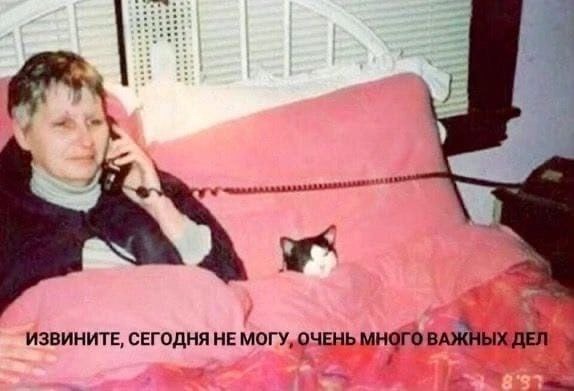

Это уже не мем, а правда жизни🤩

### БОНУС (2.5 баллов)

Градиентный спуск — далеко не единственный метод оптимизации. 
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2.5 баллов)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии. 

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [71]:
import math

In [72]:
def simulated_annealing(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, n_iterations: int = 1000) -> List[np.ndarray]:
    
    hist = list()
    hist.append(w_init)
    
    t0 = 1000
    cur_loss = 0
    k = 0
    t = t0
    tmin = 0.1
    old_w = w_init
    while t > tmin:
        for _ in range(8):
            cur_loss = loss.calc_loss(X, y, old_w)
            new_w = old_w + np.random.standard_t(3, size=old_w.shape)
            new_loss = loss.calc_loss(X, y, new_w)
            if cur_loss > new_loss:
                old_w = new_w
                hist.append(old_w)
                
            
            else:
                p = np.exp(-(new_loss - cur_loss) / t)
                r = np.random.uniform(low=0, high=1)
                if r < p:
                    old_w = new_w
                    hist.append(old_w)
        k += 1
        t = t0 / (1 + k)
    
    return hist

In [73]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [74]:
loss = MSELoss()

In [75]:
loss_GD = list()
GD = gradient_descent(w_init, X, y, loss, 0.01, 1000)
for i in range (len(GD)):
    loss_GD.append(loss.calc_loss(X, y, GD[i]))

In [76]:
loss_SA = list()
SA = simulated_annealing(w_init, X, y, loss, 1000)
for i in range (len(SA)):
    loss_SA.append(loss.calc_loss(X, y, SA[i]))

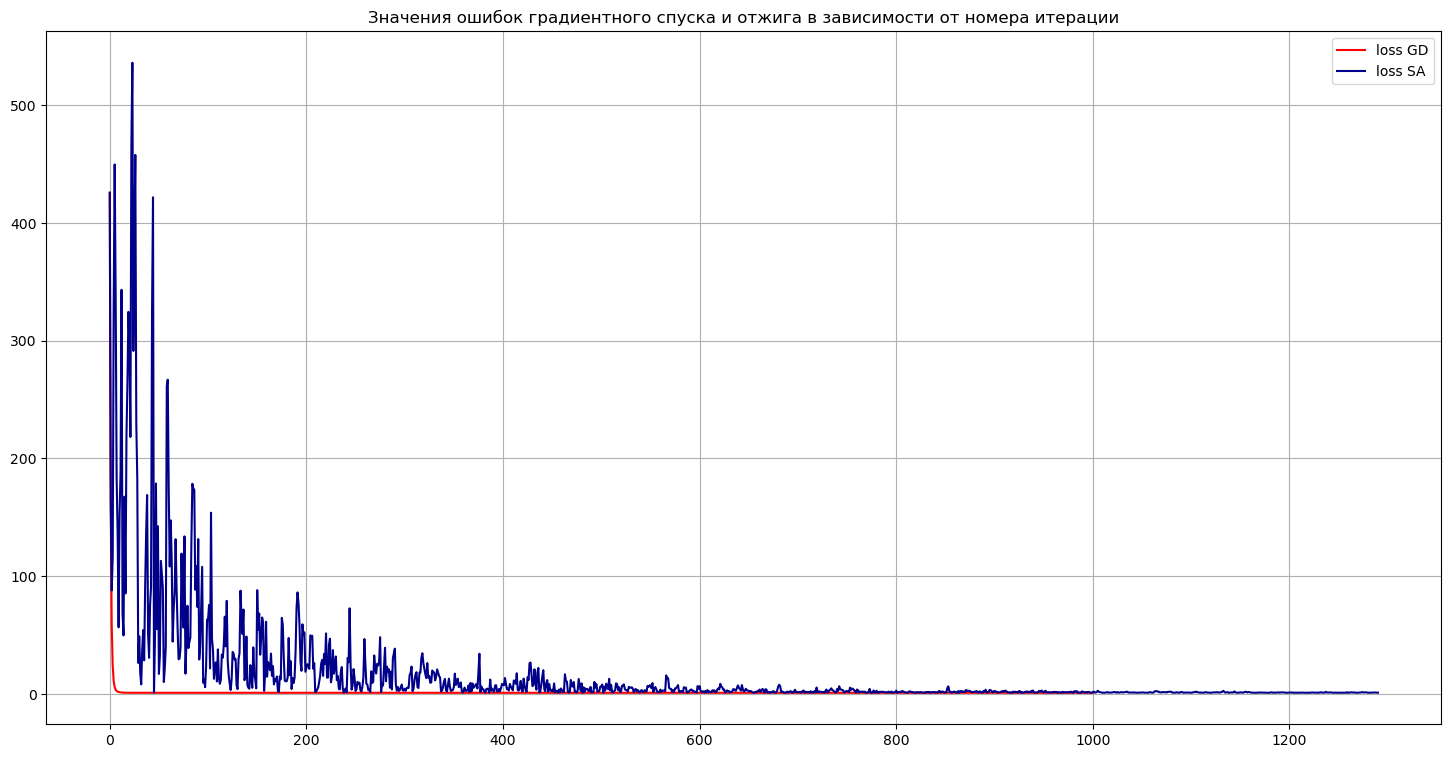

In [77]:
plt.figure(figsize=(18, 9))
x = np.arange(1001)
plt.plot(x, loss_GD, color = 'red')
plt.plot(loss_SA, color = 'darkblue')
plt.legend(['loss GD','loss SA'])
plt.title('Значения ошибок градиентного спуска и отжига в зависимости от номера итерации')
plt.grid()
plt.show()

In [78]:
(loss_GD[-1], loss_SA[-1])

(0.8670644395649091, 0.9718648040917263)

При заданных параметрах алгоритма имитации отжига получилась примерно одинаковая маленькая ошибка, причем можно заметить, что отжиг идет более хаотически, поскольку перемещается из одной точки в другую, а с увеличением номера итерации скачки затухают.

Источники (а мало ли....)
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.optimize.anneal.html
https://pryazhnikov.com/notes/simulated-annealing/
http://www.machinelearning.ru/wiki/index.php?title=%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0
https://docs.scipy.org/doc/scipy-1.1.0/reference/generated/scipy.optimize.basinhopping.html#scipy.optimize.basinhopping